# Programming for Data Analysis Project 2020

## Problem Statement

- Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.

- Investigate the types of variables involved, their likely distributions, and their relationships with each other.

- Synthesise/simulate a data set as closely matching their properties as possible.

- Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.


### Project Outline

Subject Matter - Road Collisions for a given year. For this project we will use 2018. To create a dataset, intial variables are:
1. Collision type
2. Month
3. Day
4. Date
5. Month
6. Time Band
7. Sex
8. Age
9. Road User.
10. County (maybe)

In 2018 there was 8150 fatal and serious casulaties so this will be our sample size for the intial dataset. Once this is complete another summary dataset can be created summarised by date. In this table we may add, Speeding fines, traffic volumes - km driven for further analyitical purposes.

### Project Plan

#### 1. Gathering research data
* Gather data from CSO datasets and RSA datsets for collisions by:
  - Month
  - Day
  - Time Band
  - Road User (cover Sex and Age)

* Traffic data from the annual Transport Omnibus 

* Fixed Charged Notices from Garda.ie for
  - Speeding
  - Intoxication
  - Mobile Phones
  
Initial formatting of csv files in order to create Pandas dataframes

#### 2. EDA (Research) of these datasets
* To understand required distributions, averages etc. to create out dataset
  - 5 years of data for percentage breakdowns, averages and weighted averages not for overall figures.

#### 3. Variables and Functions
* Create relevant variables and functions to be used for simulated dataset
  - p values
  - weighted averages
  - lists
  - dictionaries
  
#### 4. Create intial dataset
* creation of categorical based dataset that summary will be based on.
  - Create dates based on monthly and daily p values and distribution
  - dates will automatically created day and month
  - Monthly collisions by type (conditional binomial by month depending on EDA)
  - Time band - might be by month depending on initial EDA
  - Road User - might be by month depending on initial EDA
  - Sex (conditional binomial by month depending on EDA)

#### 5. Summary datset
* summarise intial dataset by data
* add in traffic and fcns

#### 6. EDA of the summary Dataset.
* summarise by each variable
* pairplot for collisons, fcns, traffic





### Python Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from collections import defaultdict

rng = np.random.default_rng()

plt.rcParams['figure.figsize'] = [24, 20]
plt.style.use('ggplot')

## Road Collisions on Irish Roads



### Distribution by Day

Using the research data based on the collsions by month for 2018, we will distribute across our dataset based on % breakdown for each month. This will form the count of days in each month where we will then apply a date based on further research of the collsions by weekday.

In [2]:
#import collisions by month data
by_month_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Month.csv')

In [3]:
#creating a total columns by adding all columns together
by_month_df['Total'] = by_month_df['2014'] + by_month_df['2015'] +by_month_df['2016'] +by_month_df['2017'] +by_month_df['2018']
print('Data table for collsions by month, type and year')
by_month_df

Data table for collsions by month, type and year


,Month,Type,2014,2015,2016,2017,2018,Total
0,January,Fatalities,16,12,15,16,12,71
1,February,Fatalities,13,13,10,11,10,57
2,March,Fatalities,15,11,17,20,14,77
3,April,Fatalities,14,7,14,7,17,59
4,May,Fatalities,18,12,20,8,4,62
5,June,Fatalities,18,13,12,14,16,73
6,July,Fatalities,18,19,21,16,8,82
7,August,Fatalities,15,14,13,10,12,64
8,September,Fatalities,11,16,18,13,10,68
9,October,Fatalities,17,11,20,11,9,68


#### List of days for sorting outputs

In [4]:
#list of months to produce an output descending in month order of list
#ref https://stackoverflow.com/questions/48042915/sort-a-pandass-dataframe-series-by-month-name
months = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December']

#### % Breakdown by Month of Collisions from Research Data
 We can apply the *groupby* function to return the % breakdown of collisions by month and filter for the year 2018. This includes both Fatal and Serious as will be distributing them later in the notebook. 
 
There is some extra code included to produce an output in monthly order for the purposes of the output table.

In [5]:
#Dataframe of just 2018 Collisions grouped by Month
Monthly_2018_Collisions = by_month_df.groupby('Month')['2018'].sum()

#Total of all months
Total_2018_Collisions = sum(by_month_df.groupby('Month')['2018'].sum())

#creating % breakdown by month
Normalised_2018_Collisions = (Monthly_2018_Collisions/Total_2018_Collisions).to_frame('%').reset_index()

#applying an order by month
Normalised_2018_Collisions['Month'] = pd.Categorical(Normalised_2018_Collisions['Month'],categories=months, ordered=True)

#sorted by month
Normalised_2018_Collisions  = Normalised_2018_Collisions.sort_values(['Month'])
Normalised_2018_Collisions

,Month,%
4,January,0.074847
3,February,0.071779
7,March,0.074724
0,April,0.075951
8,May,0.090429
6,June,0.088589
5,July,0.090552
1,August,0.079264
11,September,0.085276
10,October,0.089816


#### Breakdown by Monthly Totals from Research Data
Again year using the *groupby* function to group by month and year we produce an output of the total count of collisions by month for 2018.

In [6]:
#Dataframe of just 2018 Collisions grouped by Month
Monthly_2018_Collisions = by_month_df.groupby('Month')['2018'].sum()

#Total of all months
Total_2018_Collisions = sum(by_month_df.groupby('Month')['2018'].sum())

#creating % breakdown by month
Total_Monthly_2018_Collisions = (Monthly_2018_Collisions).to_frame('Total').reset_index()

#applying an order by month
Total_Monthly_2018_Collisions['Month'] = pd.Categorical(Total_Monthly_2018_Collisions['Month'],categories=months, ordered=True)

#sorted by month
Total_Monthly_2018_Collisions  = Total_Monthly_2018_Collisions.sort_values(['Month'])
Total_Monthly_2018_Collisions

,Month,Total
4,January,610
3,February,585
7,March,609
0,April,619
8,May,737
6,June,722
5,July,738
1,August,646
11,September,695
10,October,732


#### Identifying *p* values month distribution

Based on the % breakdown of collisons by month for 2018, this will form our *p* values to us as a parameter in the numpy.random.choice function to produce each month length (size) for our simulated dataset. Below, we create a numpy array from the % breadown of collsions by month for 2018.

In [7]:
#p-values to be used in function to create number of dates in each month
month_p_values = np.array(Normalised_2018_Collisions['%'])
month_p_values

array([0.07484663, 0.07177914, 0.07472393, 0.07595092, 0.09042945,
       0.08858896, 0.09055215, 0.0792638 , 0.08527607, 0.08981595,
       0.09042945, 0.08834356])

#### Applying *p* values to np.random.choice function creating 8150 datapoints

The new dataset will be *8150* in length (size) because the actual collisions for 2018 was *8150*. Below we pass our *P* values and dataset size to the *numpy.random.choice* function. This in turn is passed as a parameter to form a new dataset.

In [8]:
#size of dataset 8150, 2018 had 8150 collisions so we will use this figure

dataset_size = 8150
month_df = pd.DataFrame(rng.choice(months,dataset_size,p=(month_p_values)),columns=['Month'])


#### Breakdown by Monthly Totals from Simulated Data
Using the *groupby* function like before, we can produce the count by month for our simulated data.

In [9]:

month_df_totals = (month_df.groupby('Month')['Month'].count()).to_frame('Total').reset_index()

month_df_totals['Month'] = pd.Categorical(month_df_totals['Month'],categories=months, ordered=True)
month_df_totals = month_df_totals.sort_values(['Month'])
month_df_totals

,Month,Total
4,January,598
3,February,594
7,March,602
0,April,642
8,May,758
6,June,721
5,July,723
1,August,602
11,September,704
10,October,692


#### Comparison of Actual v Simulate Data by Month

The simulated data and actual data are now compared.
We can see a comparison below in a:
 * Table
 * Barplot
 * KDE
 * Lineplot

In [10]:


months_for_compare = month_df_totals['Month']
simulated_month = month_df_totals['Total']
actual_month = Total_Monthly_2018_Collisions['Total']

sim_months = pd.Series(simulated_month,name='Simulated Data')
actual_months = pd.Series(actual_month,name='Actual Data')

month_compare_df = pd.DataFrame(months_for_compare)
month_compare_df['Simulated Data'] = sim_months
month_compare_df['Actual Data'] = actual_months
month_compare_df['Variance'] = month_compare_df['Simulated Data']-month_compare_df['Actual Data']
month_compare_df['% Variance to Actual'] = round(month_compare_df['Variance']/month_compare_df['Actual Data'],3)

month_compare_df

,Month,Simulated Data,Actual Data,Variance,% Variance to Actual
4,January,598,610,-12,-0.020
3,February,594,585,9,0.015
7,March,602,609,-7,-0.011
0,April,642,619,23,0.037
8,May,758,737,21,0.028
6,June,721,722,-1,-0.001
5,July,723,738,-15,-0.020
1,August,602,646,-44,-0.068
11,September,704,695,9,0.013
10,October,692,732,-40,-0.055


''

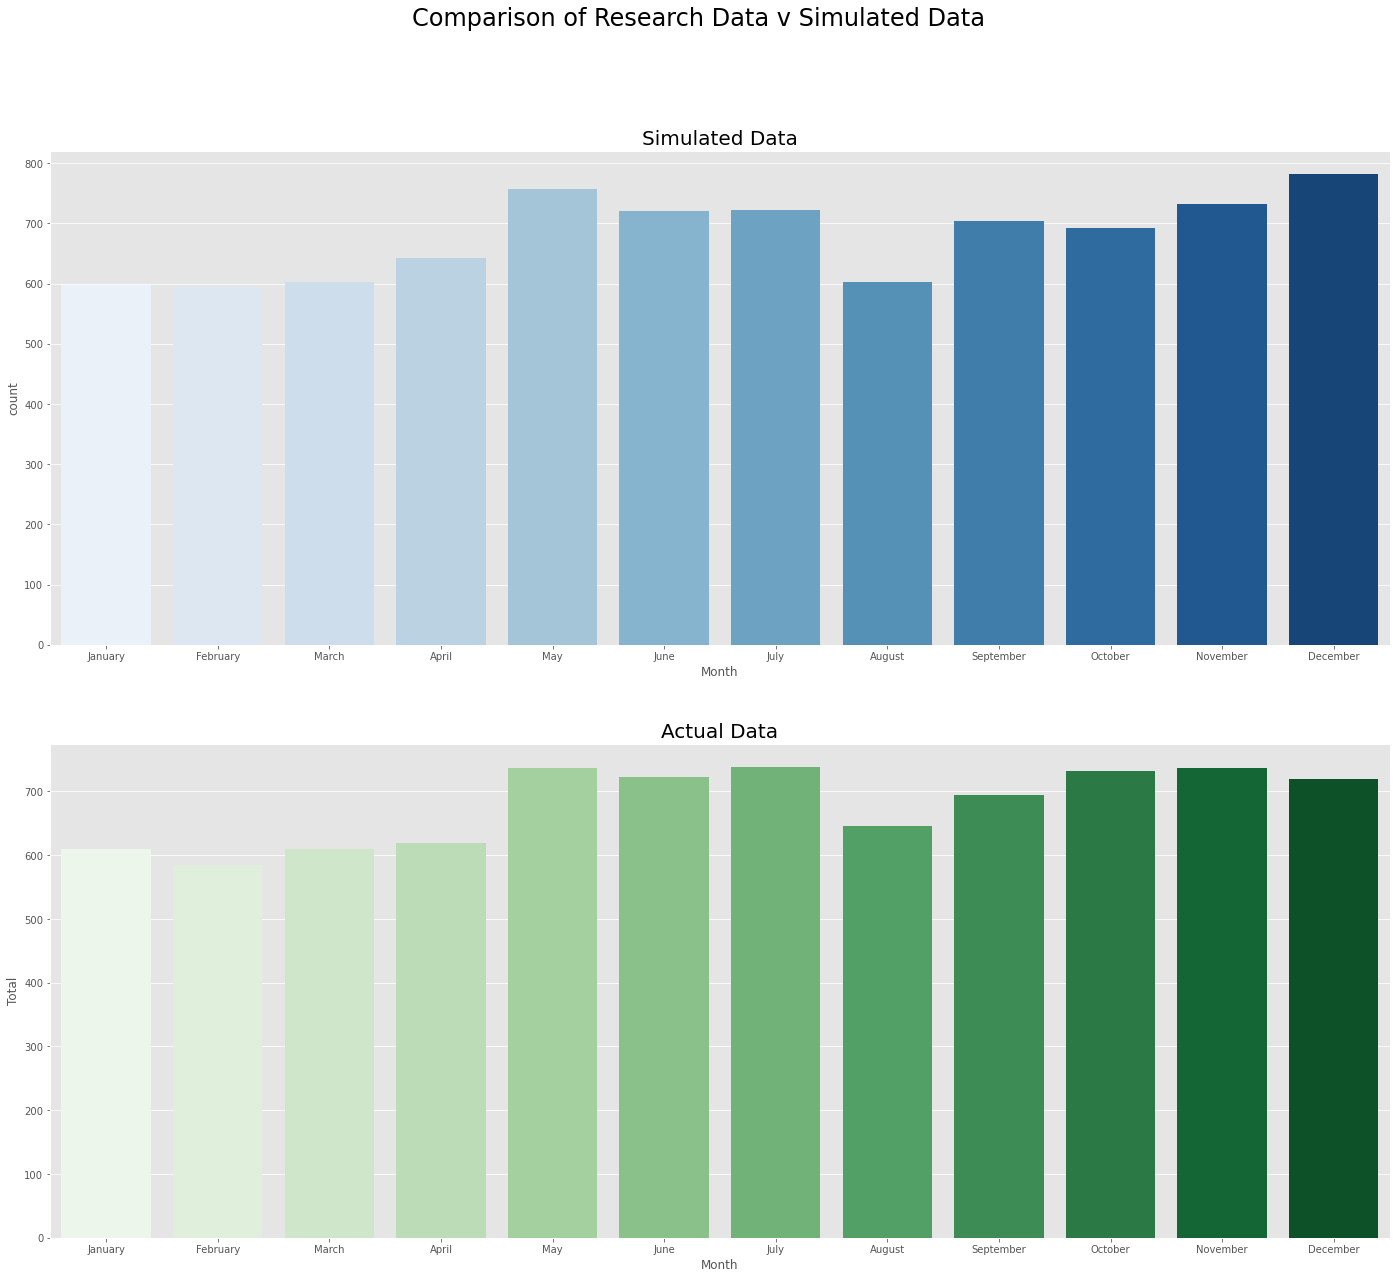

In [11]:
#plt.figure(figsize=(22,20))

plt.suptitle('Comparison of Research Data v Simulated Data',fontsize = 24)

plt.subplot(2,1,1)
plt.title('Simulated Data',fontsize=20)
sns.countplot(x='Month',data=month_df,palette='Blues',order=months)

plt.subplot(2,1,2)
plt.title('Actual Data',fontsize=20)
sns.barplot(x='Month',y='Total',data=Total_Monthly_2018_Collisions,ci=None,palette='Greens')

;

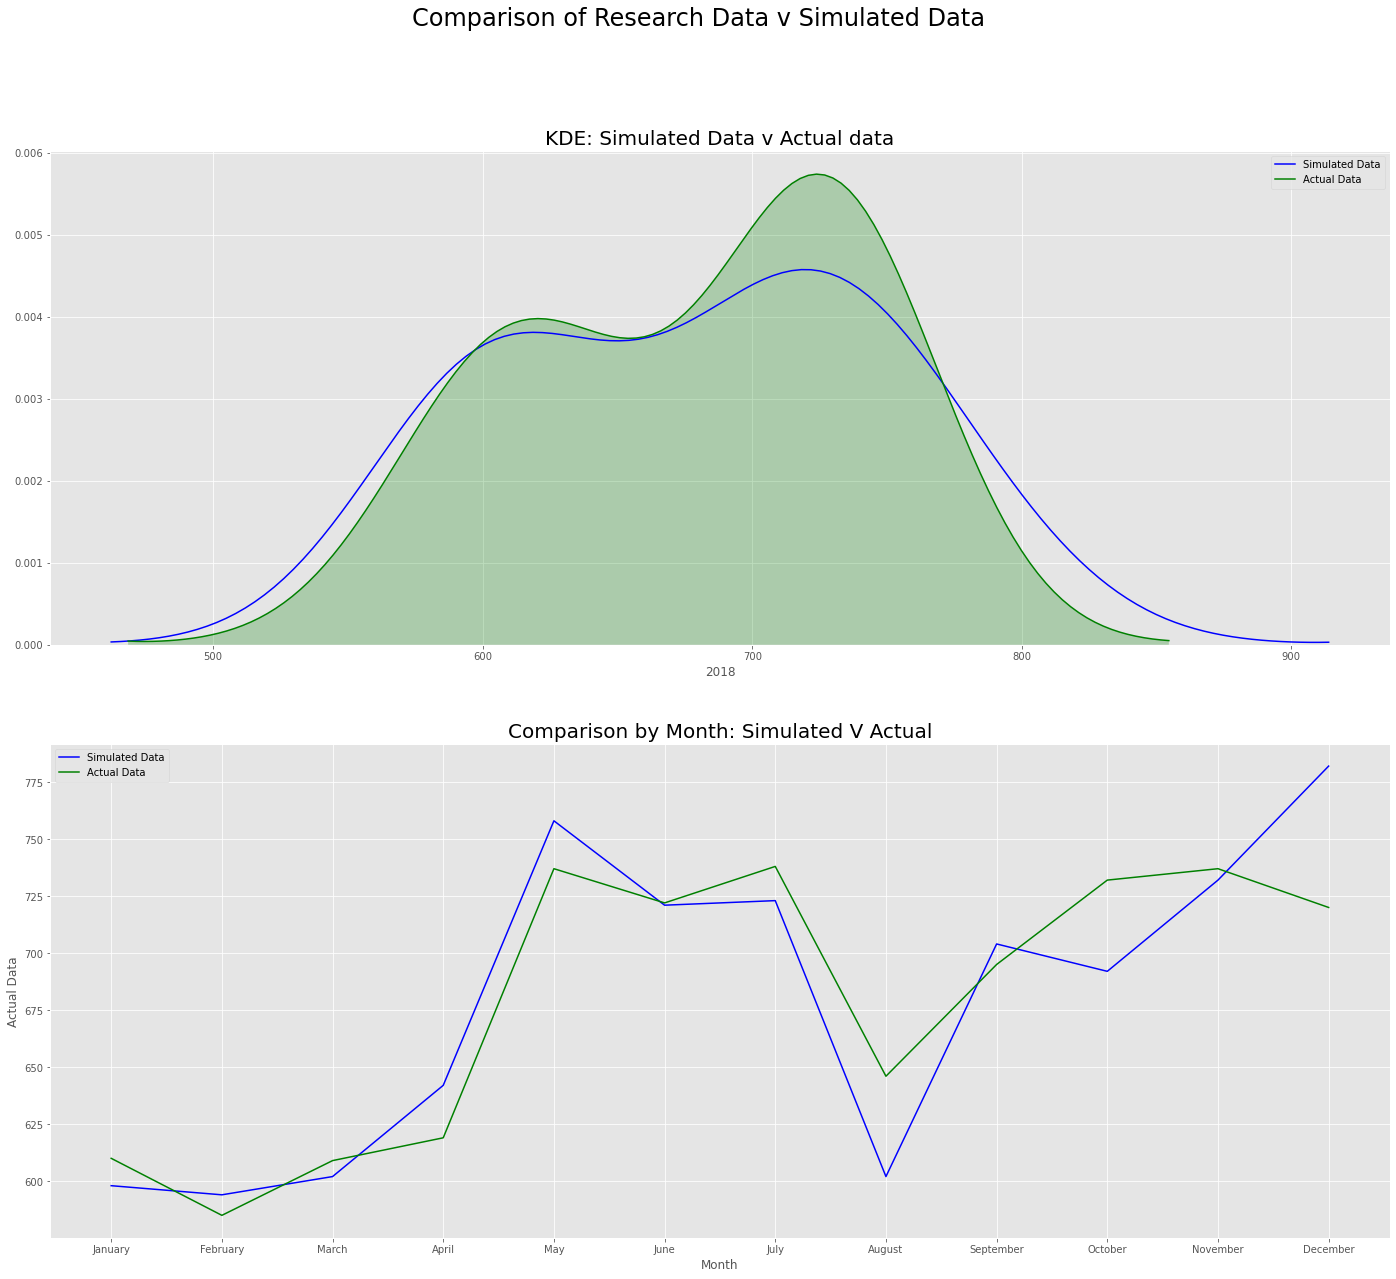

In [12]:
plt.suptitle('Comparison of Research Data v Simulated Data',fontsize = 24)

plt.subplot(2,1,1)
plt.title('KDE: Simulated Data v Actual data',fontsize=20)
sns.distplot(month_df['Month'].value_counts(),hist=False,color='Blue',label = 'Simulated Data')
sns.distplot(by_month_df.groupby('Month')['2018'].sum(),hist=False,color='Green',kde_kws={"shade": True}, label ='Actual Data')

plt.subplot(2,1,2)
plt.title('Comparison by Month: Simulated V Actual',fontsize=20)
sns.lineplot(x='Month',y='Simulated Data',data=month_compare_df,color='b',label='Simulated Data')
sns.lineplot(x='Month',y='Actual Data',data=month_compare_df,color='g',label='Actual Data');

#### Function to return *size* length of each month to form part of out main dataset

In [13]:
def size(df,col,m):
    "Function to return size of a months within a given dataframe"
    
    #length of the column values
    size = len(df[df[col]==m])
    
    #return the size
    return size

## By Day

Using the research data based on the collsions by day for 2018, we will distribute across our dataset based on % breakdown for each day. This will work ina function along with the Monthly *p* values to form our main dataset.

In [14]:
#imort collisions by day research data
by_day_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Day.csv')

In [15]:
by_day_df

,Day,Type,2014,2015,2016,2017,2018
0,Sunday,Fatalities,30,31,37,31,31
1,Sunday,Serious,1050,1076,1044,1062,995
2,Monday,Fatalities,26,20,20,38,18
3,Monday,Serious,1248,1172,1105,1065,1137
4,Tuesday,Fatalities,18,27,29,17,22
5,Tuesday,Serious,1143,1086,1094,1084,1145
6,Wednesday,Fatalities,25,20,25,17,17
7,Wednesday,Serious,1062,1122,1113,1130,1108
8,Thursday,Fatalities,38,19,32,10,15
9,Thursday,Serious,1113,1113,1040,1156,1203


#### List of Days 

This list is to produce an summary output descending by day order using *pd.Categorical*. Also, it will form part of a function that will distribute dates across each month.

In [16]:
##list of days to produce an output descending in month order of list and to form a dictionary along with Day p values
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#### % Breakdown by Day of Collisions from Research Data

In [17]:
day_collisions = by_day_df.groupby('Day')['2018'].sum()
total_day = sum(by_day_df.groupby('Day')['2018'].sum())
normalised_day = (day_collisions/total_day).to_frame('%').reset_index()
normalised_day['Day'] = pd.Categorical(normalised_day['Day'],categories=days, ordered=True)

normalised_day  = normalised_day.sort_values(['Day'])
normalised_day

,Day,%
1,Monday,0.141718
5,Tuesday,0.143190
6,Wednesday,0.138037
4,Thursday,0.149448
0,Friday,0.163190
2,Saturday,0.138528
3,Sunday,0.125890


#### % Breakdown by Day of Collisions from Research Data

In [18]:

day_collisions = by_day_df.groupby('Day')['2018'].sum()
#totals_day = sum(by_day_df.groupby('Day')['2018'].sum())
totals_day = (day_collisions).to_frame('Total').reset_index()
totals_day['Day'] = pd.Categorical(totals_day['Day'],categories=days, ordered=True)

totals_day  = totals_day.sort_values(['Day'])
totals_day

,Day,Total
1,Monday,1155
5,Tuesday,1167
6,Wednesday,1125
4,Thursday,1218
0,Friday,1330
2,Saturday,1129
3,Sunday,1026


#### Identifying *p* values for day distribution

In [19]:
#p-values to be used in function to create number of dates in each month
day_p_values = np.array(normalised_day['%'])
day_p_values

array([0.14171779, 0.14319018, 0.13803681, 0.14944785, 0.16319018,
       0.13852761, 0.12588957])

#### Dictionary of Day names and *p* values

In [20]:
#https://stackoverflow.com/questions/52207358/create-dictionary-from-two-numpy-arrays
day_p_dict= {}
for A,B in zip(days, day_p_values):
    day_p_dict[A] = B

In [21]:
day_p_dict

{'Monday': 0.14171779141104293,
 'Tuesday': 0.14319018404907977,
 'Wednesday': 0.13803680981595093,
 'Thursday': 0.1494478527607362,
 'Friday': 0.16319018404907976,
 'Saturday': 0.13852760736196318,
 'Sunday': 0.12588957055214725}

#### Date Function

The below functions takes each month and applies the day *p* values to create a date value to for our main dataset.


In [22]:
def dates(y,m,d,ml,sz):
    days = day_p_dict#{"Monday":0.14,"Tuesday":0.14,"Wednesday":0.14,"Thursday":0.14,"Friday":0.17,"Saturday":0.14,"Sunday":0.13}
    date_list = [(datetime.datetime(y, m, d) + datetime.timedelta(days=x)) for x in range(ml)]
    d = defaultdict(list)
    for i in date_list:
        d[i.strftime("%A")].append(i.strftime('%d/%m/%y'))
    
    result = np.random.choice(list(d.values()),
p=[days.get(i) for i in list(d.keys())],
                          size=sz)#,replace=False)
    
    
    final = [np.random.choice(i) for i in result]
    return final

#### Variables created by month from above function distributing days according to the day *p* values.

In [23]:
#applying dates function to create dates for n month below

jan_dates = dates(2018,1,1,31,size(month_df,'Month','January'))
feb_dates = dates(2018,2,1,29,size(month_df,'Month','February'))
mar_dates = dates(2018,3,1,31,size(month_df,'Month','March'))
apr_dates = dates(2018,4,1,30,size(month_df,'Month','April'))
may_dates = dates(2018,5,1,31,size(month_df,'Month','May'))
jun_dates = dates(2018,6,1,30,size(month_df,'Month','June'))
jul_dates = dates(2018,7,1,31,size(month_df,'Month','July'))
aug_dates = dates(2018,8,1,31,size(month_df,'Month','August'))
sept_dates = dates(2018,9,1,30,size(month_df,'Month','September'))
oct_dates = dates(2018,10,1,31,size(month_df,'Month','October'))
nov_dates = dates(2018,11,1,30,size(month_df,'Month','November'))
dec_dates = dates(2018,12,1,31,size(month_df,'Month','December'))

In [24]:
#concatanation of above variables
date_concat = jan_dates+feb_dates+mar_dates+apr_dates+may_dates+jun_dates+jul_dates+aug_dates+sept_dates+oct_dates+nov_dates+dec_dates

#check if sizes are equal
print("Check if both are the same size")
len(date_concat) == len(month_df['Month'])

Check if both are the same size


True

### Creation of our main dataset
The first column will be the dates that were created from the month and day distributions from the research of the 2018 collision data. The date value will be converted into datetime from an object.

In [25]:
#dataset
df = pd.DataFrame(date_concat,columns=['Date'])

#converting dates generated from our function into datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

#display datatype of our date values
df.dtypes

Date    datetime64[ns]
dtype: object

#### Adding Day number, Day names and month name to our dataset`m

In [26]:
#Day number
#df['Day_Num'] = df['Date'].dt.dayofweek

#day name
df['Day'] = df['Date'].dt.day_name()

#month number
#df['Month_Num'] = df['Date'].dt.month
#month name

df['Month'] = df['Date'].dt.month_name()

#check first 5 rows of dataset
print(df.head(5))
print(" ")
#check bottom 5 rows
print(df.tail(5))

        Date       Day    Month
0 2018-01-27  Saturday  January
1 2018-01-21    Sunday  January
2 2018-01-18  Thursday  January
3 2018-01-29    Monday  January
4 2018-01-01    Monday  January
 
           Date       Day     Month
8145 2018-12-28    Friday  December
8146 2018-12-21    Friday  December
8147 2018-12-16    Sunday  December
8148 2018-12-11   Tuesday  December
8149 2018-12-29  Saturday  December


#### % Breakdown by day from Simulated Data

In [27]:
#grouping simualted data by day
df_day_collisions = df.groupby('Day')['Day'].count()

#creating a % breakdown 
df_normalised_days = (df_day_collisions/sum(df_day_collisions)).to_frame('%').reset_index()

#pdCategorical to produce an output sorted by month
df_normalised_days['Day'] = pd.Categorical(df_normalised_days['Day'],categories=days,ordered=True)

#% breakdown bt day
df_normalised_days = df_normalised_days.sort_values(['Day'])

#### Breakdown by day totals from Simulated Data

In [28]:
#grouping simualted data by day
df_day_collisions = df.groupby('Day')['Day'].count()

#creating total by month
df_day_totals = (df_day_collisions).to_frame('Total').reset_index()

#pdCategorical to produce an output sorted by month
df_day_totals['Day'] = pd.Categorical(df_day_totals['Day'],categories=days,ordered=True)

#% breakdown bt day
df_day_totals = df_day_totals.sort_values(['Day'])

#### Comparison of Actual v Simulate Data by Day

In [29]:
#creating a compartive table between actual and simulated data
days_for_compare = df_day_totals['Day']
simulated_day = df_day_totals['Total']
actual_day = totals_day['Total']

sim_days = pd.Series(simulated_day,name='Simulated Data')
actual_days = pd.Series(actual_day,name='Actual Data')

#adding column values
day_compare_df = pd.DataFrame(days_for_compare)
day_compare_df['Simulated Data'] = sim_days
day_compare_df['Actual Data'] = actual_days
day_compare_df['Variance'] = day_compare_df['Simulated Data']-day_compare_df['Actual Data']
day_compare_df['% Variance to Actual'] = round(day_compare_df['Variance']/day_compare_df['Actual Data'],3)
                                               
day_compare_df

,Day,Simulated Data,Actual Data,Variance,% Variance to Actual
1,Monday,1083,1155,-72,-0.062
5,Tuesday,1159,1167,-8,-0.007
6,Wednesday,1111,1125,-14,-0.012
4,Thursday,1261,1218,43,0.035
0,Friday,1341,1330,11,0.008
2,Saturday,1176,1129,47,0.042
3,Sunday,1019,1026,-7,-0.007


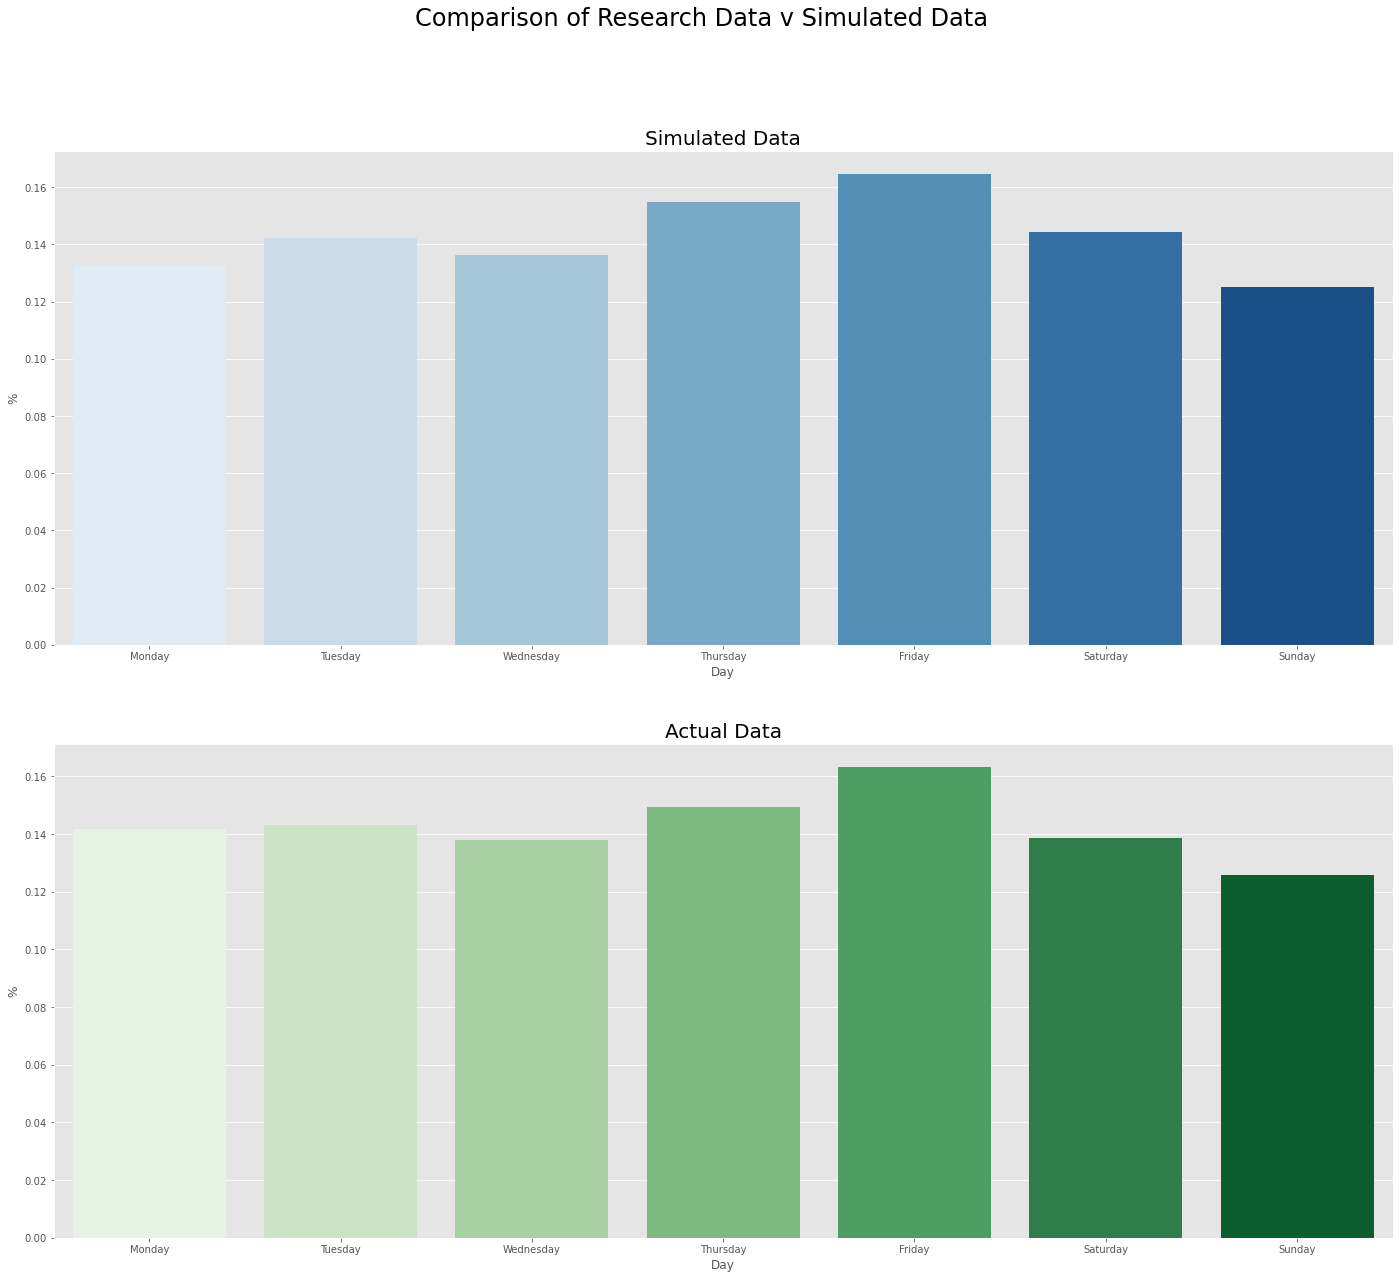

In [30]:
#barplot to display actual v simulated data

#subplot title
plt.suptitle('Comparison of Research Data v Simulated Data',fontsize = 24)

#simulated data
plt.subplot(2,1,1)
plt.title('Simulated Data',fontsize=20)
sns.barplot(x='Day',y='%',data=df_normalised_days,palette='Blues')

#actual data
plt.subplot(2,1,2)
plt.title('Actual Data',fontsize=20)
sns.barplot(x='Day',y='%',data=normalised_day,ci=None,palette='Greens');


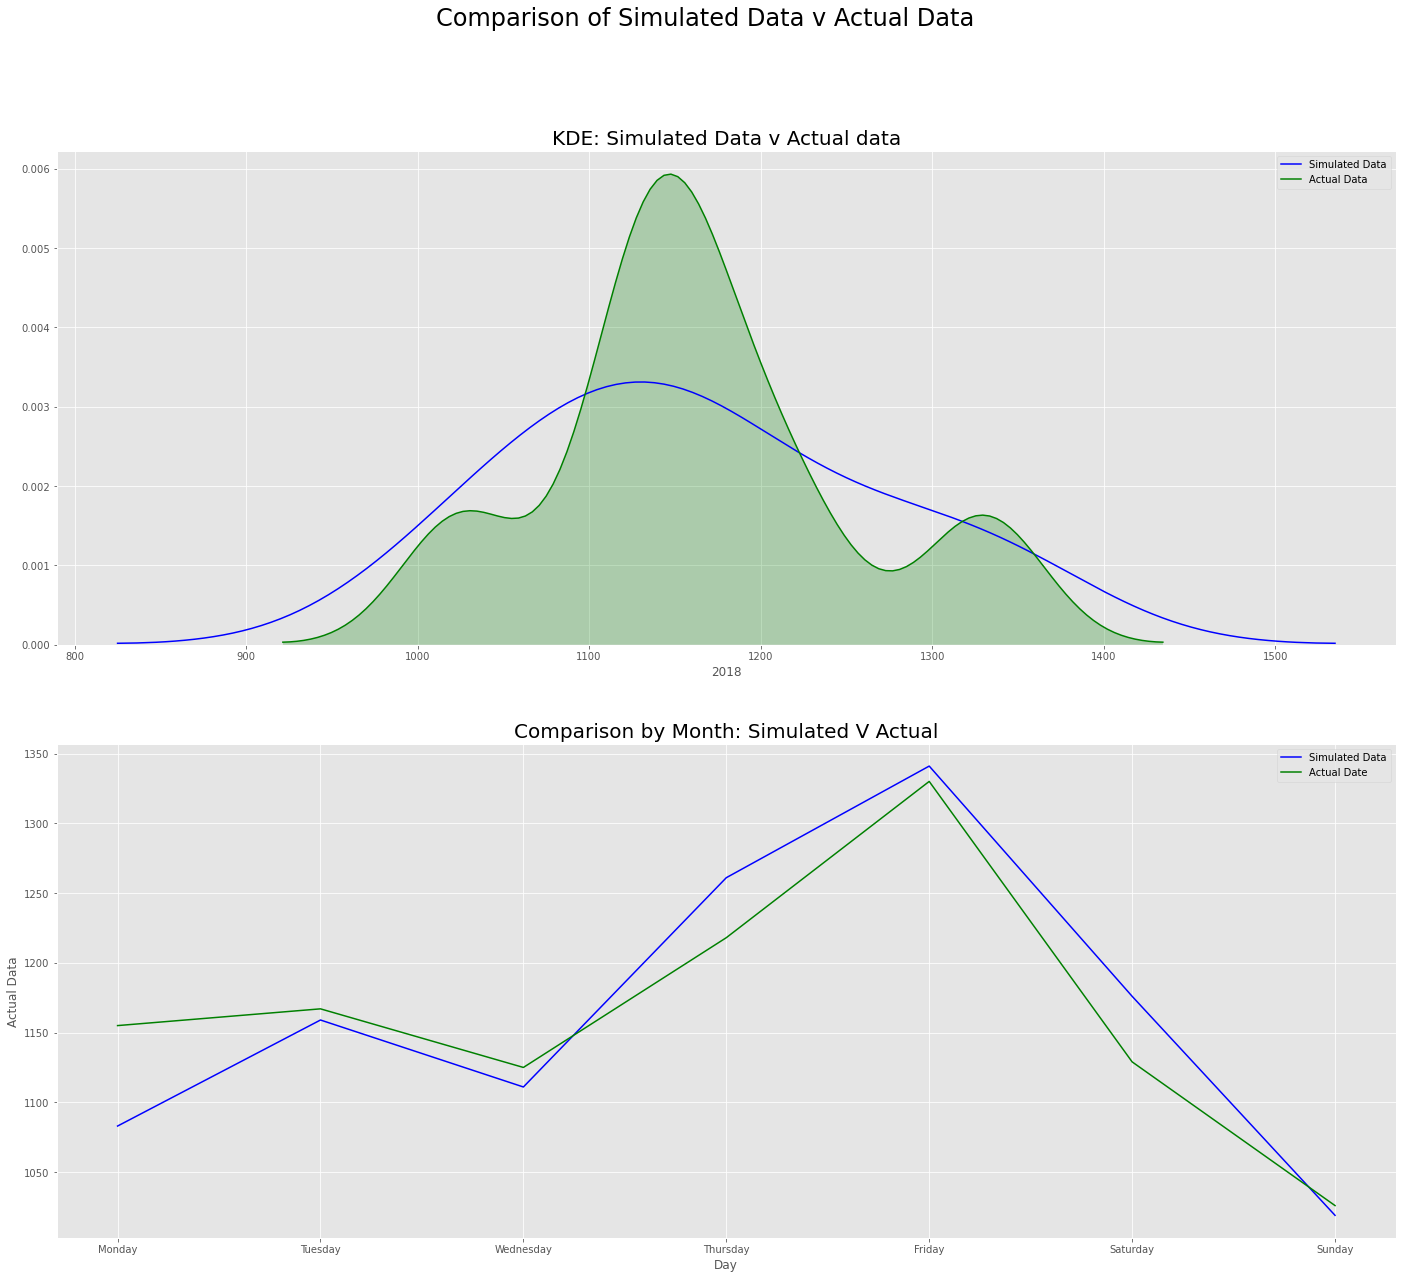

In [31]:
#KDE and Lineplot to display actual v simulated data
plt.suptitle('Comparison of Simulated Data v Actual Data',fontsize = 24)

#KDE
plt.subplot(2,1,1)
plt.title('KDE: Simulated Data v Actual data',fontsize=20)
sns.distplot(df['Day'].value_counts(),hist=False,color='Blue',kde_kws={"shade": False},label = 'Simulated Data')
sns.distplot(by_day_df.groupby('Day')['2018'].sum(),hist=False,color='Green',kde_kws={"shade": True}, label ='Actual Data')

#Lineplot
plt.subplot(2,1,2)
plt.title('Comparison by Month: Simulated V Actual',fontsize=20)
sns.lineplot(x='Day',y='Simulated Data',data=day_compare_df,color='b',label='Simulated Data')
sns.lineplot(x='Day',y='Actual Data',data=day_compare_df,color='g',label='Actual Date');

In [32]:
#https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot#bar-plot-of-column-values

#### Collison Type by Day Distribution

The next part of our simulated data will be to distribte the collison type. We can use the research data to determine the ratio between fatal and Serious Collisions for each day.

This percentage breakdown will form our *p* values to be used in a Binominal Distribution.

We can view the % of collisions wic are serious from the table below.

In [33]:
#ref #https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#aggregation by serious collision
serious_by_day = by_day_df[by_day_df['Type'] == 'Serious'].groupby('Day').agg({'2018':sum}).reset_index()

#aggregation by fatal collisions
fatals_by_day = by_day_df[by_day_df['Type'] == 'Fatalities'].groupby('Day').agg({'2018':sum}).reset_index()

#creat new dataframe
collision_days = df_day_totals['Day']
collision_by_day_df = pd.DataFrame(collision_days)

collision_by_day_df['Fatal Collisons'] = fatals_by_day['2018']
collision_by_day_df['Serious Collisons'] = serious_by_day['2018']
collision_by_day_df['Total'] = collision_by_day_df['Serious Collisons']+collision_by_day_df['Fatal Collisons']
collision_by_day_df['% Serious'] = collision_by_day_df['Serious Collisons']/collision_by_day_df['Total']


collision_by_day_df


,Day,Fatal Collisons,Serious Collisons,Total,% Serious
1,Monday,18,1137,1155,0.984416
5,Tuesday,22,1145,1167,0.981148
6,Wednesday,17,1108,1125,0.984889
4,Thursday,15,1203,1218,0.987685
0,Friday,18,1312,1330,0.986466
2,Saturday,18,1111,1129,0.984057
3,Sunday,31,995,1026,0.969786


#### Plotting the ratio of collisions between Fatal and Seriious

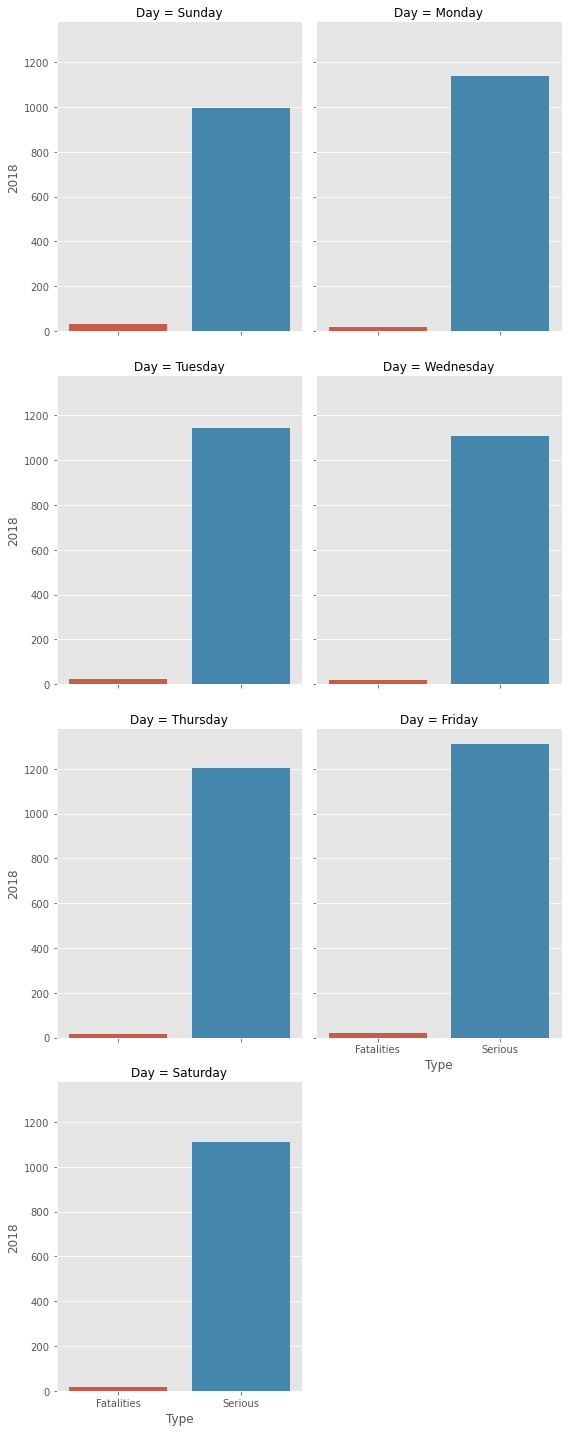

In [34]:
#ref #https://seaborn.pydata.org/generated/seaborn.catplot.html
#catplot to display by day Fatal:Serious ratio
sns.catplot(x='Type',y='2018',data=by_day_df,kind='bar',ci=True,col='Day',col_wrap=2, aspect=.8);


We can observe from the above plots that the ratio between Fatal and Serious per day is fairly uniform with the exception of Sundays where it look like there are slightly more Fatalities as a percentage of overall collisions. We can get a better visual of the % berakdown in the lineplot below.

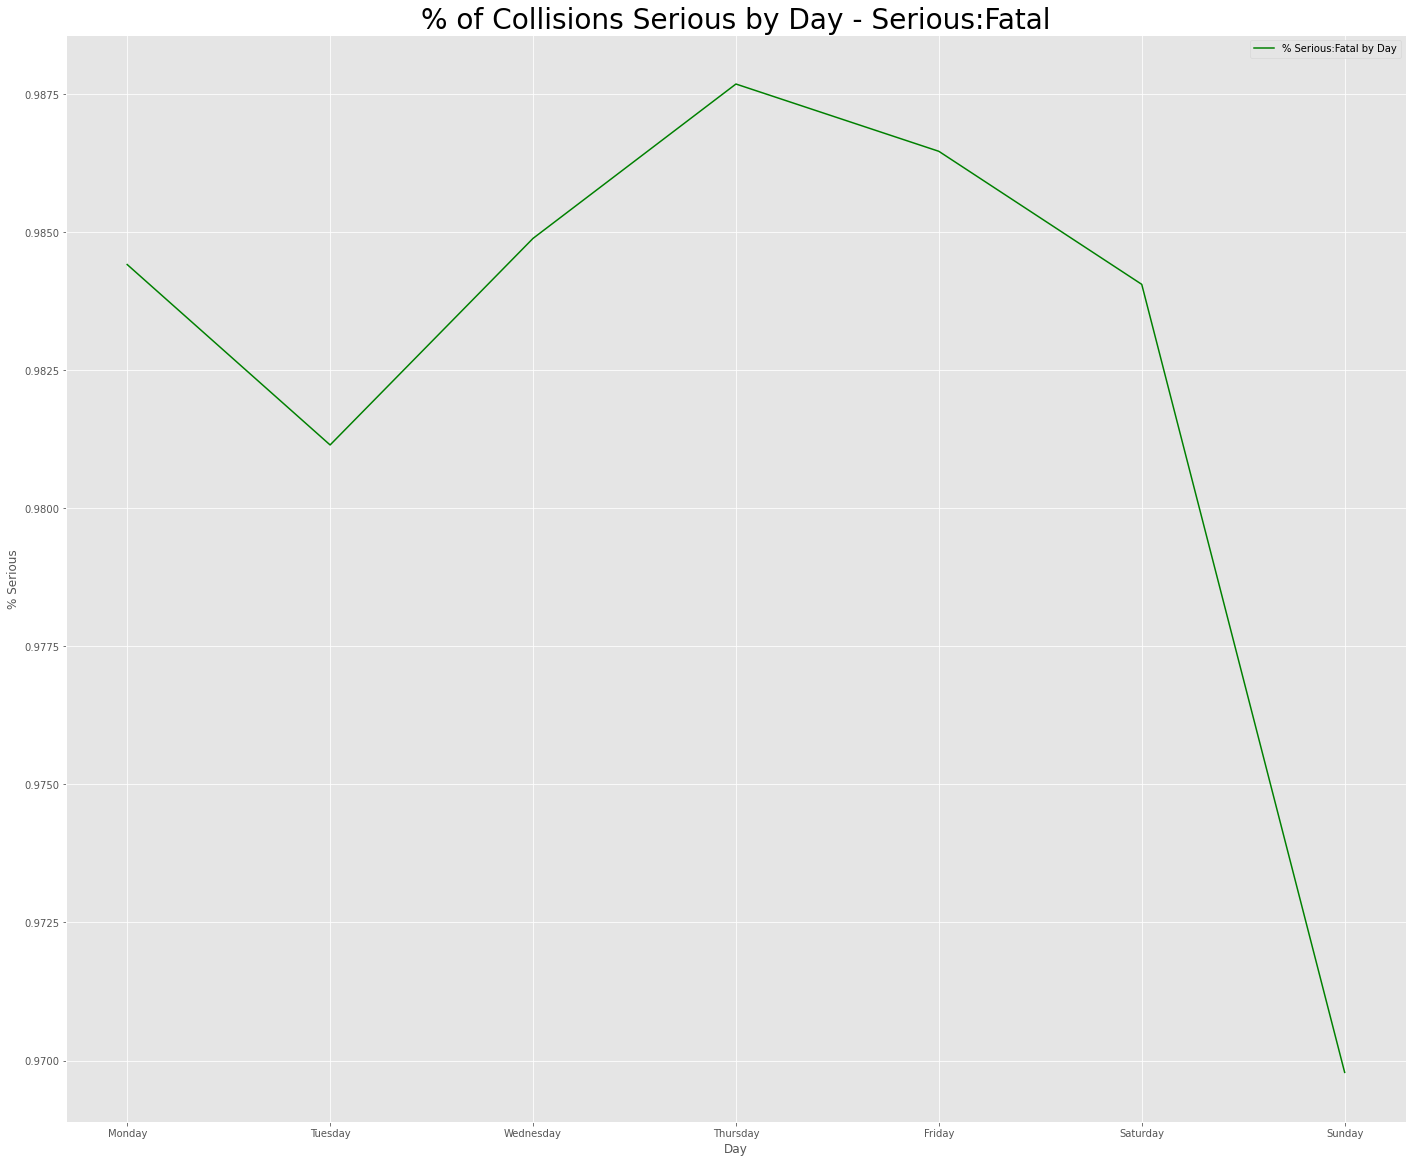

In [35]:
plt.title('% of Collisions Serious by Day - Serious:Fatal',fontsize=28)

#lineplot to show ratio by day
sns.lineplot(x='Day',y='% Serious',data=collision_by_day_df,color='g',label='% Serious:Fatal by Day');

#### *P* values

We can create an array of values for day and the correspog *p* value to be used in the numpy.random.binomial function which will distribute collision type.

In [36]:
#% serious collisions:fatal collisions
collision_type_p_values = np.array(collision_by_day_df['% Serious'])
collision_type_p_values

array([0.98441558, 0.98114824, 0.98488889, 0.98768473, 0.98646617,
       0.98405669, 0.96978558])

#### Below are variables for each day of the week applying the binomial distribution.

In [37]:
#apply binomial distribution by day
# p-values according to day name
mon_binom = rng.binomial(1,collision_type_p_values[0],dataset_size)
tues_binom = rng.binomial(1,collision_type_p_values[1],dataset_size)
weds_binom = rng.binomial(1,collision_type_p_values[2],dataset_size)
thurs_binom = rng.binomial(1,collision_type_p_values[3],dataset_size)
fri_binom = rng.binomial(1,collision_type_p_values[4],dataset_size)
sat_binom = rng.binomial(1,collision_type_p_values[5],dataset_size)
sun_binom = rng.binomial(1,collision_type_p_values[6],dataset_size)

#### We now add the *Collision Type* column to our dataset.

Using the numpy.where function we can apply conditions to reurn values according to Day name.

In [38]:
#adding collision type to dataset
#np.where to apply condition based on day name
df['Collision Type'] = np.where(df['Day']== 'Sunday', sun_binom,
                                          np.where(df['Day']== 'Saturday', sat_binom,
                                           np.where(df['Day']== 'Friday', fri_binom,
                                            np.where(df['Day']== 'Thursday',thurs_binom,
                                             np.where(df['Day']== 'Wednesday', weds_binom,
                                              np.where(df['Day']== 'Tuesday', tues_binom,
                                               mon_binom))))))

#### We convert the output of the binmomial function to string values.

* 1 Serious
* 0 Fatal

A lambda function with a condition is used to map these values

In [39]:
#ref https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
#converting binomial values to string
df['Collision Type'] = df['Collision Type'].map(lambda x: 'Serious' if x == 1 else 'Fatal')

#### We now compare our smulated data with the research data.
Arranging data to create a comparison Table

#### For Day Comparison

In [40]:
#simulated fatal collisions by day
sim_fatals_by_day = df[df['Collision Type'] == 'Fatal'].groupby('Day').agg({'Collision Type':'count'}).reset_index()

#simulated serious collisions by day
sim_serious_by_day = df[df['Collision Type'] == 'Serious'].groupby('Day').agg({'Collision Type':'count'}).reset_index()

#dateframe creation
collision_by_day_df_compare = pd.DataFrame(df_day_totals['Day'])

collision_by_day_df_compare['Actual Fatal Collisons'] = collision_by_day_df['Fatal Collisons']
collision_by_day_df_compare['Actual Serious Collisons'] = collision_by_day_df['Serious Collisons']

collision_by_day_df_compare['Simulated Fatal Collisons'] = sim_fatals_by_day['Collision Type']
collision_by_day_df_compare['Simulated Serious Collisons'] = sim_serious_by_day['Collision Type']

collision_by_day_df_compare['Variance Fatal Collisions'] = collision_by_day_df_compare['Simulated Fatal Collisons'] - collision_by_day_df_compare['Actual Fatal Collisons']
collision_by_day_df_compare['Variance Serious Collisions'] = collision_by_day_df_compare['Simulated Serious Collisons'] - collision_by_day_df_compare['Actual Serious Collisons']

#### For Month Comparison

In [41]:
#serious collsions by month
serious_by_month = by_month_df[by_month_df['Type'] == 'Serious'].groupby('Month').agg({'2018':sum}).reset_index()

#fatals by month
fatals_by_month = by_month_df[by_month_df['Type'] == 'Fatalities'].groupby('Month').agg({'2018':sum}).reset_index()

collision_months = Normalised_2018_Collisions['Month']

#dataframe creation for comparision
collision_by_month_df = pd.DataFrame(collision_months)

collision_by_month_df['Actual Fatal Collisons'] = fatals_by_month['2018']
collision_by_month_df['Actual Serious Collisons'] = serious_by_month['2018']
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

serious_by_month_df = df[df['Collision Type'] == 'Serious'].groupby('Month').agg({'Collision Type':'count'}).reset_index()
fatals_by_month_df = df[df['Collision Type'] == 'Fatal'].groupby('Month').agg({'Collision Type':'count'}).reset_index()

collision_by_month_df_compare = pd.DataFrame(collision_months)

collision_by_month_df['Simulated Fatal Collisons'] = fatals_by_month_df['Collision Type']
collision_by_month_df['Simulated Serious Collisons'] = serious_by_month_df['Collision Type']

collision_by_month_df['Variance Fatal Collisions'] = collision_by_month_df['Simulated Fatal Collisons'] - collision_by_month_df['Actual Fatal Collisons']
collision_by_month_df['Variance Serious Collisions'] = collision_by_month_df['Simulated Serious Collisons'] - collision_by_month_df['Actual Serious Collisons']

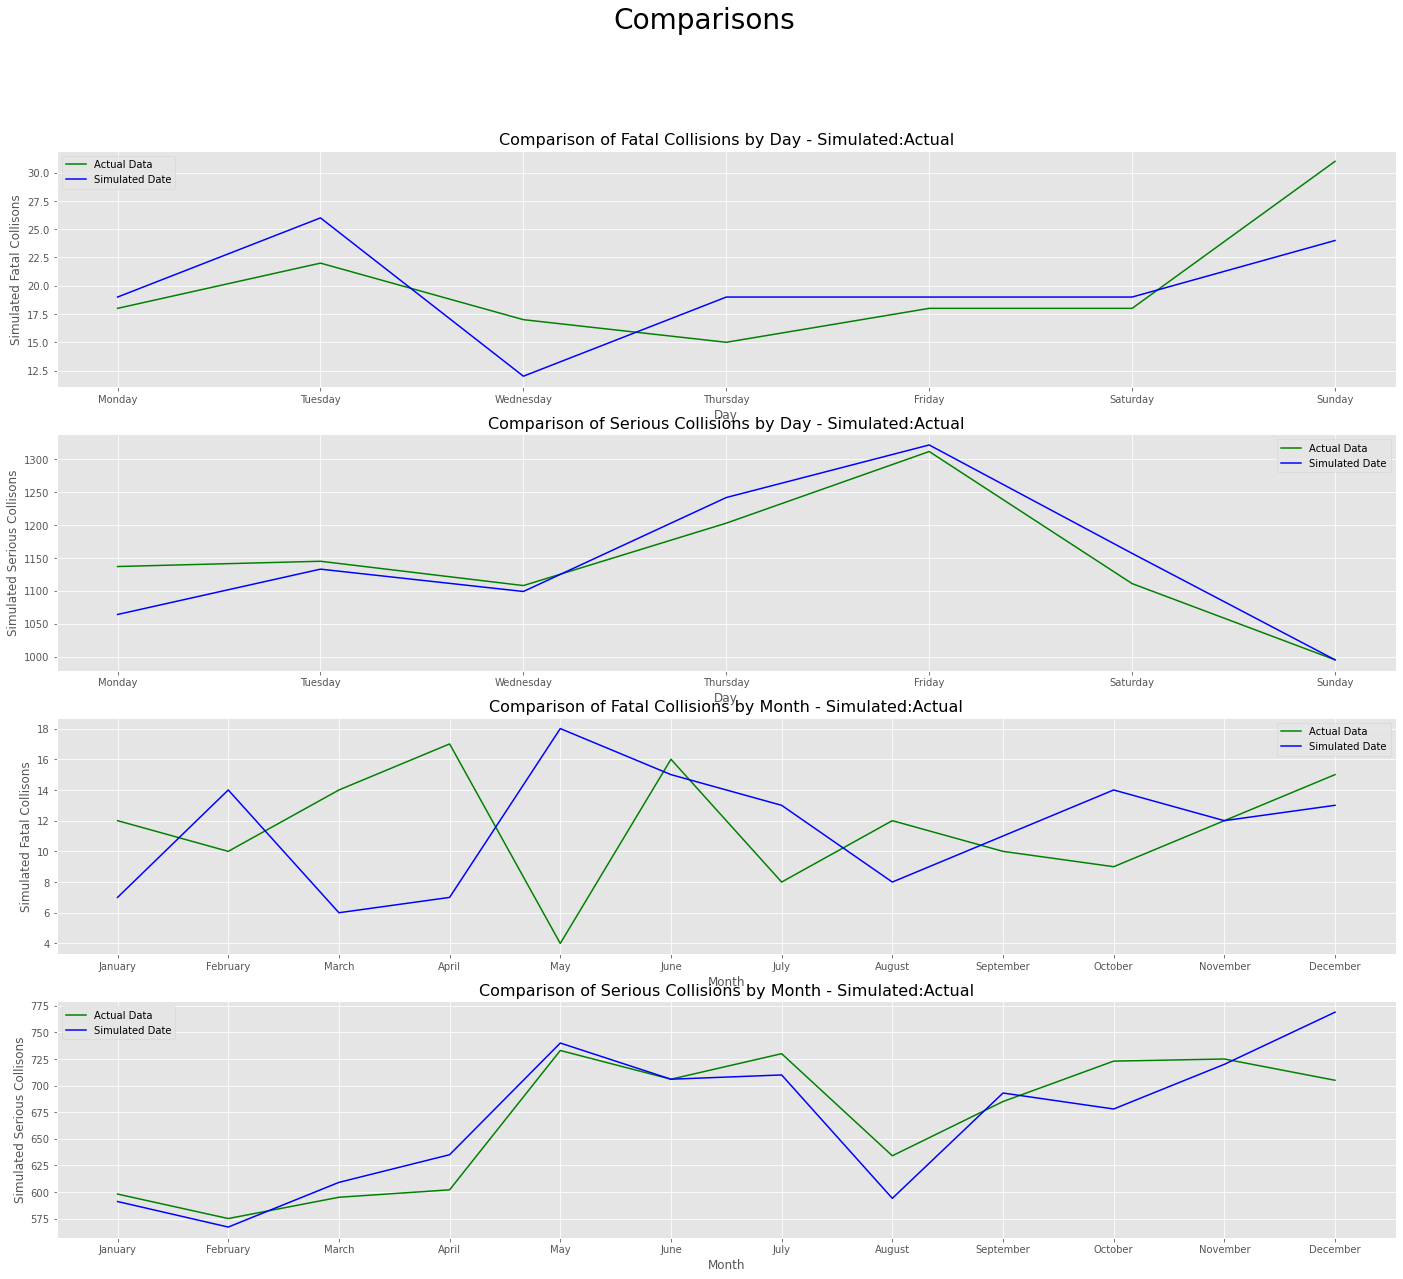

In [42]:
plt.suptitle('Comparisons',fontsize=28)

plt.subplot(4,1,1)
plt.title('Comparison of Fatal Collisions by Day - Simulated:Actual',fontsize=16)
sns.lineplot(x='Day',y='Actual Fatal Collisons',data=collision_by_day_df_compare,color='g',label='Actual Data')
sns.lineplot(x='Day',y='Simulated Fatal Collisons',data=collision_by_day_df_compare,color='b',label='Simulated Date');

plt.subplot(4,1,2)
plt.title('Comparison of Serious Collisions by Day - Simulated:Actual',fontsize=16)
sns.lineplot(x='Day',y='Actual Serious Collisons',data=collision_by_day_df_compare,color='g',label='Actual Data')
sns.lineplot(x='Day',y='Simulated Serious Collisons',data=collision_by_day_df_compare,color='b',label='Simulated Date')

plt.subplot(4,1,3)
plt.title('Comparison of Fatal Collisions by Month - Simulated:Actual',fontsize=16)
sns.lineplot(x='Month',y='Actual Fatal Collisons',data=collision_by_month_df,color='g',label='Actual Data')
sns.lineplot(x='Month',y='Simulated Fatal Collisons',data=collision_by_month_df,color='b',label='Simulated Date')

plt.subplot(4,1,4)
plt.title('Comparison of Serious Collisions by Month - Simulated:Actual',fontsize=16)
sns.lineplot(x='Month',y='Actual Serious Collisons',data=collision_by_month_df,color='g',label='Actual Data')
sns.lineplot(x='Month',y='Simulated Serious Collisons',data=collision_by_month_df,color='b',label='Simulated Date');

In [43]:
collision_by_day_df_compare

,Day,Actual Fatal Collisons,Actual Serious Collisons,Simulated Fatal Collisons,Simulated Serious Collisons,Variance Fatal Collisions,Variance Serious Collisions
1,Monday,18,1137,19,1064,1,-73
5,Tuesday,22,1145,26,1133,4,-12
6,Wednesday,17,1108,12,1099,-5,-9
4,Thursday,15,1203,19,1242,4,39
0,Friday,18,1312,19,1322,1,10
2,Saturday,18,1111,19,1157,1,46
3,Sunday,31,995,24,995,-7,0


In [44]:
#comparison table by month
collision_by_month_df

,Month,Actual Fatal Collisons,Actual Serious Collisons,Simulated Fatal Collisons,Simulated Serious Collisons,Variance Fatal Collisions,Variance Serious Collisions
4,January,12,598,7,591,-5,-7
3,February,10,575,14,567,4,-8
7,March,14,595,6,609,-8,14
0,April,17,602,7,635,-10,33
8,May,4,733,18,740,14,7
6,June,16,706,15,706,-1,0
5,July,8,730,13,710,5,-20
1,August,12,634,8,594,-4,-40
11,September,10,685,11,693,1,8
10,October,9,723,14,678,5,-45


### By Gender

In [45]:
by_age_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Age.csv')

In [46]:
fatals_by_gender = by_age_df[by_age_df['Type'] == 'Fatalities'].groupby('Sex').agg({'2018':sum}).reset_index()
serious_by_gender = by_age_df[by_age_df['Type'] == 'Serious'].groupby('Sex').agg({'2018':sum}).reset_index()

gender_groupby = by_age_df.groupby('Sex')['2018'].sum().to_frame().reset_index()

collisions_by_gender = pd.DataFrame(gender_groupby['Sex'])
collisions_by_gender['Fatal'] = fatals_by_gender['2018']
collisions_by_gender['Serious'] = serious_by_gender['2018']
collisions_by_gender['Total'] = collisions_by_gender['Fatal']+ collisions_by_gender['Serious']
collisions_by_gender['% Serious'] = collisions_by_gender['Serious']/collisions_by_gender['Total']

In [47]:
gender_p_value = collisions_by_gender.iloc[1:,3][1] / (collisions_by_gender.iloc[1:,3][1] + collisions_by_gender.iloc[0:1,3][0])
gender_fatals_p_value = collisions_by_gender.iloc[1:,1][1]/(collisions_by_gender.iloc[1:,1][1] +collisions_by_gender.iloc[0:1,1][0])
gender_serious_p_value = collisions_by_gender.iloc[1:,2][1]/(collisions_by_gender.iloc[1:,2][1] +collisions_by_gender.iloc[0:1,2][0])
print("All Collisions p value:" ,gender_p_value)
print("Fatal Collisions p value:",gender_fatals_p_value)
print("Serious Collisions p value:",gender_serious_p_value)

All Collisions p value: 0.5786551511412709
Fatal Collisions p value: 0.7841726618705036
Serious Collisions p value: 0.5750690434345971


#### Gender Distribution

We can see that Males make up approx. 57% for all collisions and serious collisions. However for Fatalities the distribution is quite different where approx 78% of Fatalities are male. 

We will have to apply a gender condtion when applying the binmoial distribution.

In [48]:
df['Gender'] = np.where(df['Collision Type']== 'Fatal', rng.binomial(1,gender_fatals_p_value,dataset_size)
                        ,rng.binomial(1,gender_serious_p_value,dataset_size))

In [49]:
df['Gender'] = df['Gender'].map(lambda x: 'Male' if x == 1 else 'Female')

#### Comparison

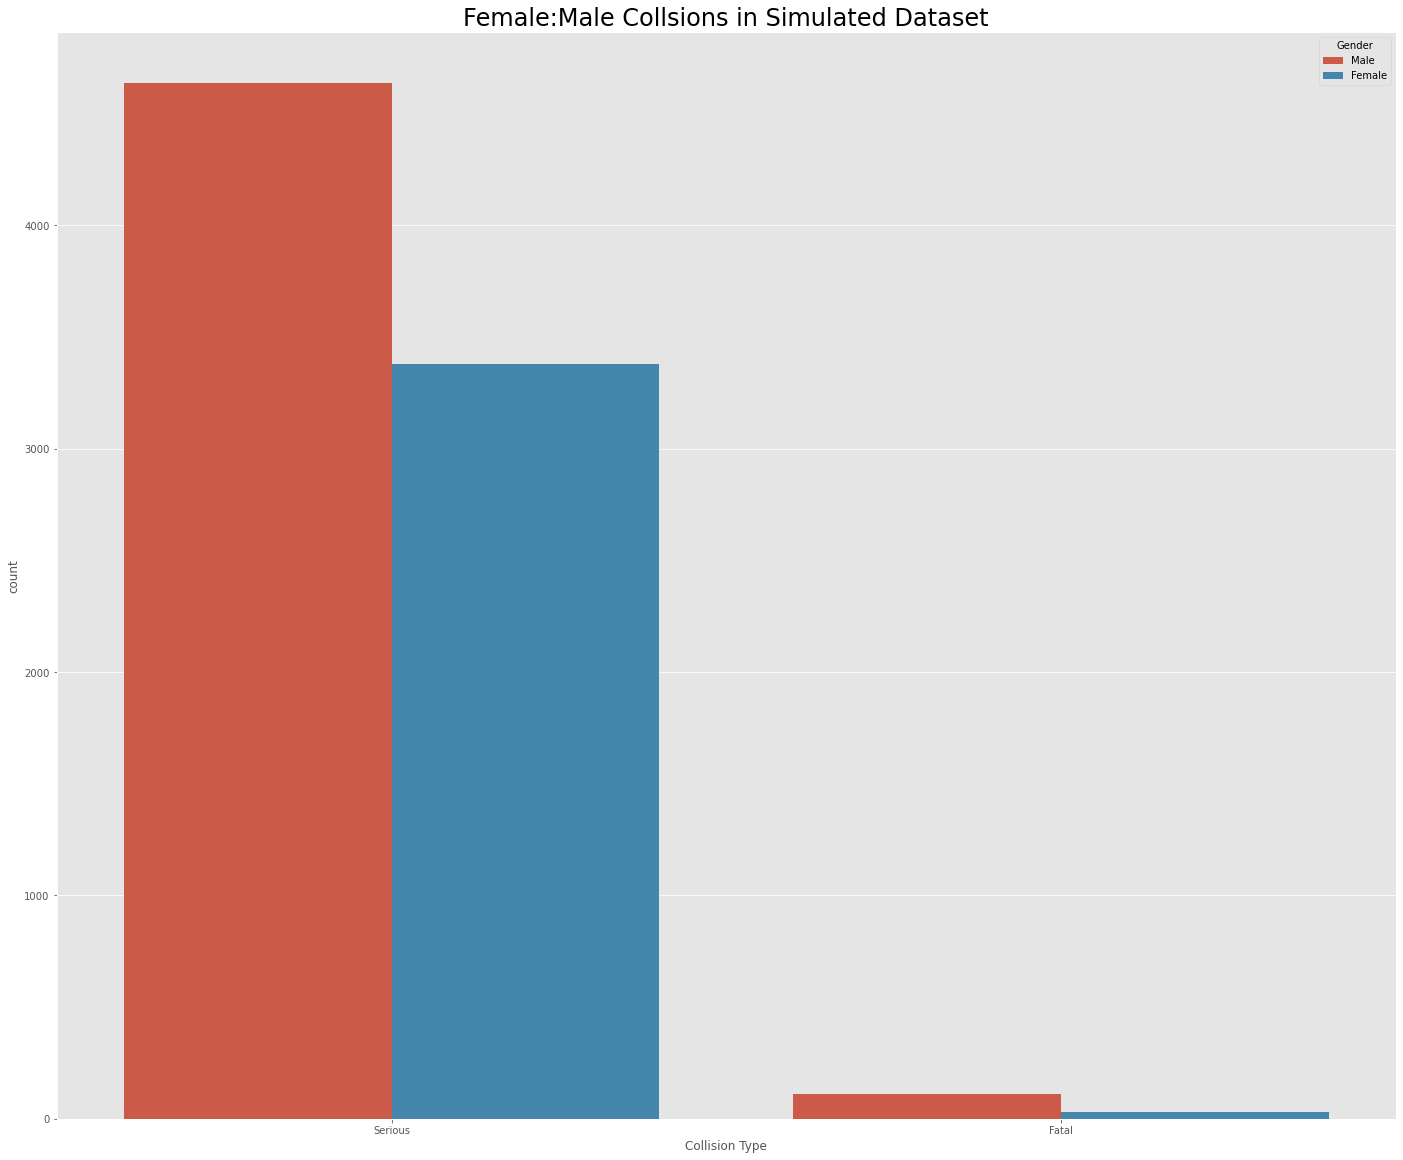

In [50]:
plt.title('Female:Male Collsions in Simulated Dataset',fontsize=24)
sns.countplot(x="Collision Type", hue="Gender", data=df);

#### Age Band

From the research data we can determine the % breakdown by age band and apply to our dataset applying the numpy.choice function.

In [51]:
normalised_age_breakdown = by_age_df.groupby('Age')['2018'].sum()/sum(by_age_df.groupby('Age')['2018'].sum())
normalised_age_breakdown_df = pd.DataFrame(normalised_age_breakdown).reset_index()
normalised_age_breakdown_df

,Age,2018
0,0 - 5 years,0.016533
1,10 - 14 years,0.034670
2,15 - 17 years,0.036151
3,18 - 20 years,0.058359
4,21 - 24 years,0.083775
5,25 - 34 years,0.206663
6,35 - 44 years,0.186552
7,45 - 54 years,0.145589
8,55 - 64 years,0.103023
9,6 - 9 years,0.020975


#### List of age groups in order for plotting purposes

In [52]:
age_groups = ['0 - 5 years','6 - 9 years','10 - 14 years','15 - 17 years','18 - 20 years','21 - 24 years','25 - 34 years','35 - 44 years','45 - 54 years','55 - 64 years','65 years and over']

#### Arranging *p* values

In [53]:
age_p_values = np.array(normalised_age_breakdown_df['2018'])
age_groups = list(normalised_age_breakdown_df['Age'])

#### add new age band column to dataset

In [54]:
df['Age Band'] = rng.choice(age_groups,dataset_size,p=(age_p_values))

#### normalised vaues from new dataset

In [55]:
age_bands = df['Age Band'].value_counts(normalize=True)
age_band_df = age_bands.to_frame().reset_index()
age_band_df

,index,Age Band
0,25 - 34 years,0.212393
1,35 - 44 years,0.182822
2,45 - 54 years,0.145031
3,65 years and over,0.107730
4,55 - 64 years,0.103804
5,21 - 24 years,0.084540
6,18 - 20 years,0.053988
7,15 - 17 years,0.036933
8,10 - 14 years,0.033129
9,6 - 9 years,0.021227


#### Plot for comparision

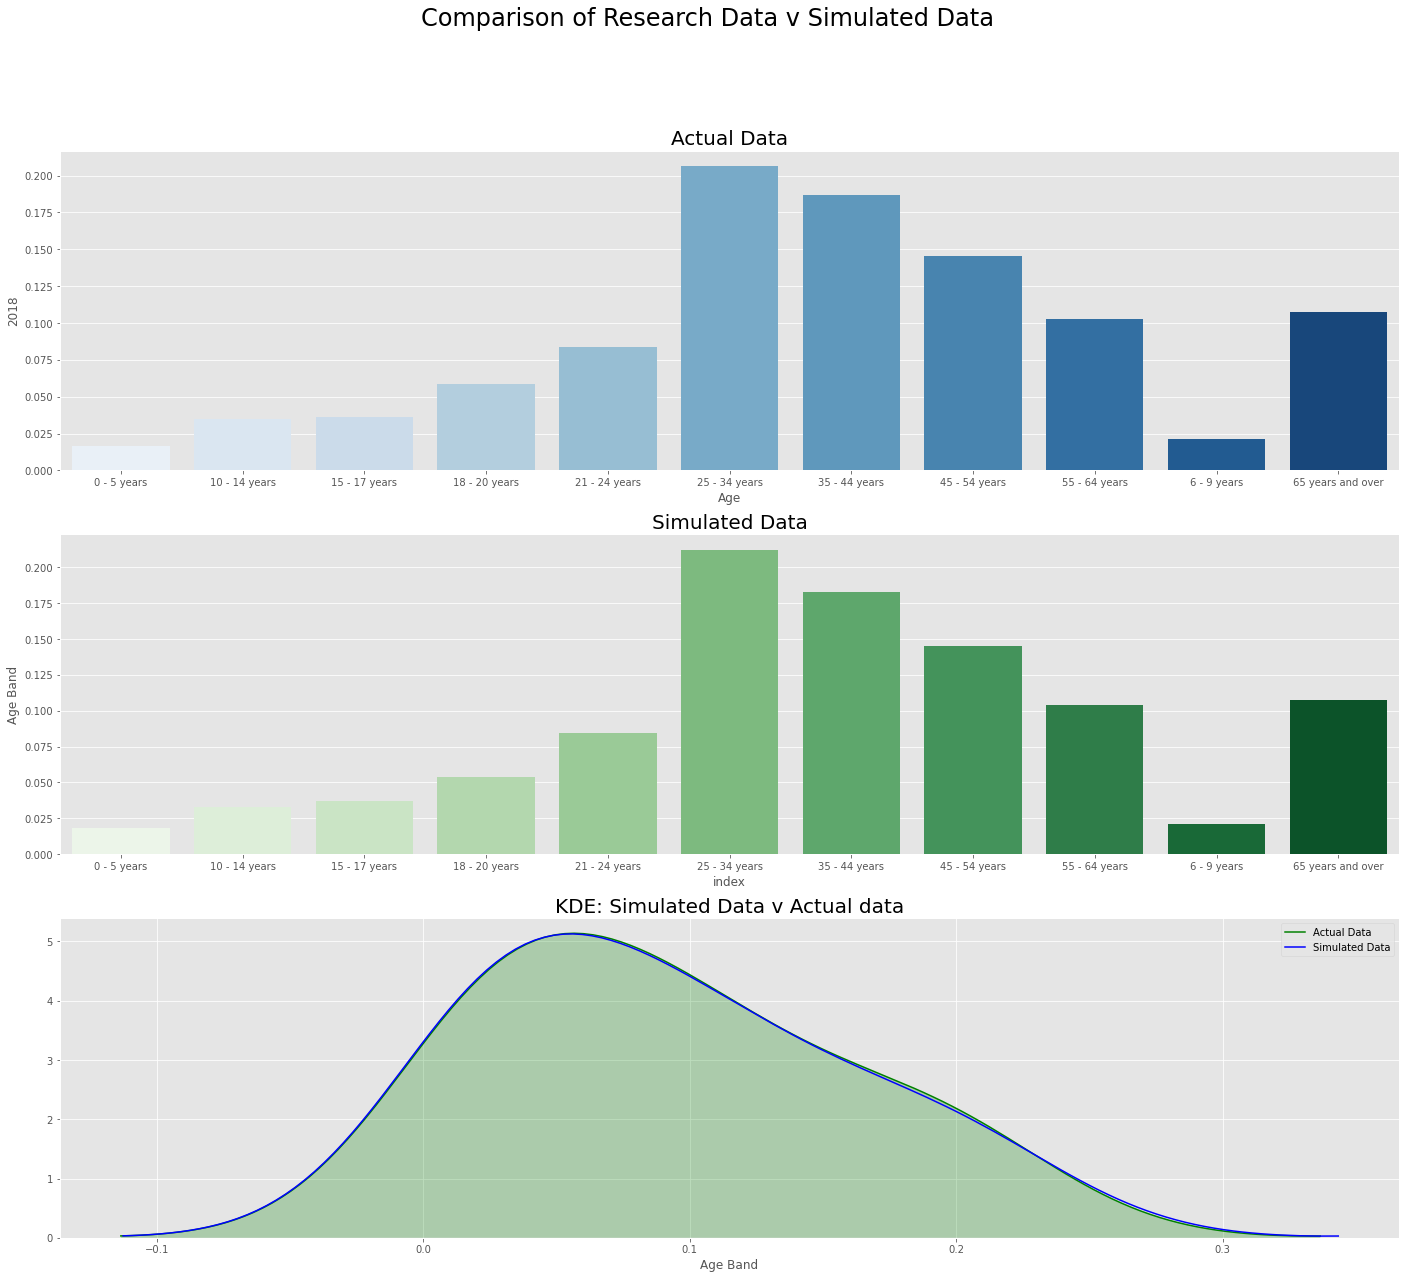

In [56]:
plt.suptitle('Comparison of Research Data v Simulated Data',fontsize = 24)

plt.subplot(3,1,1)
plt.title('Actual Data',fontsize=20)
sns.barplot(x='Age',y='2018',data=normalised_age_breakdown_df,ci=None,palette='Blues',order=age_groups)

plt.subplot(3,1,2)

plt.title('Simulated Data',fontsize=20)
sns.barplot(x='index',y='Age Band',data=age_band_df,palette='Greens',order=age_groups)

plt.subplot(3,1,3)
plt.title('KDE: Simulated Data v Actual data',fontsize=20)
sns.distplot(normalised_age_breakdown_df['2018'],hist=False,kde_kws={"shade": True},color='Green',label = 'Actual Data')
sns.distplot(age_band_df['Age Band'],hist=False,color='Blue',kde_kws={"shade": False}, label ='Simulated Data');

#### By Time

The next coumn to be added to our dataset is the breakdown of collisions by time. We will be dealing with 3 hour time bands and taking the distribution from the research data and applying it to our simulatation, We may have to split between Fatal and Serious again depending on the % breakdown.

In [57]:
#import research data
by_time_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Hour.csv')

#### New column breaking hour values into three hour time bands

In [58]:
by_time_df['time_band']=np.where(by_time_df['Hour'] <3,'00:00 -03:00',
         np.where(by_time_df['Hour'] <6, '03:00 - 06:00',
                  np.where(by_time_df['Hour'] <9, '06:00 - 09:00',
                           np.where(by_time_df['Hour'] <12, '09:00 - 12:00',
                                    np.where(by_time_df['Hour'] <15, '12:00 - 15:00',
                                             np.where(by_time_df['Hour'] <18, '15:00 - 18:00',
                                                      np.where(by_time_df['Hour'] <21,'18:00 - 21:00',
                                                               '21:00 - 24:00')))))))

In [59]:
by_time_df.head(5)

,Hour,Type,2014,2015,2016,2017,2018,time_band
0,0,Fatalities,3,6,4,7,6,00:00 -03:00
1,0,Serious,161,178,167,131,166,00:00 -03:00
2,1,Fatalities,10,5,11,7,7,00:00 -03:00
3,1,Serious,151,139,135,116,115,00:00 -03:00
4,2,Fatalities,6,10,6,4,1,00:00 -03:00


In [60]:
fatals_by_time = by_time_df[by_time_df['Type'] == 'Fatalities'].groupby('time_band').agg({'2018':sum}).reset_index()
serious_by_time = by_time_df[by_time_df['Type'] == 'Serious'].groupby('time_band').agg({'2018':sum}).reset_index()

In [61]:
fatals_by_time['%']=fatals_by_time['2018']/sum(fatals_by_time['2018'])
fatals_by_time.describe()

,2018,%
count,8.000000,8.000000
mean,17.375000,0.125000
std,5.343554,0.038443
min,10.000000,0.071942
25%,13.500000,0.097122
50%,17.500000,0.125899
75%,21.250000,0.152878
max,25.000000,0.179856


In [62]:
serious_by_time['%']=serious_by_time['2018']/sum(serious_by_time['2018'])
serious_by_time.describe()

,2018,%
count,8.000000,8.000000
mean,1001.375000,0.125000
std,570.039582,0.071157
min,224.000000,0.027962
25%,583.250000,0.072806
50%,970.500000,0.121146
75%,1453.250000,0.181407
max,1862.000000,0.232430


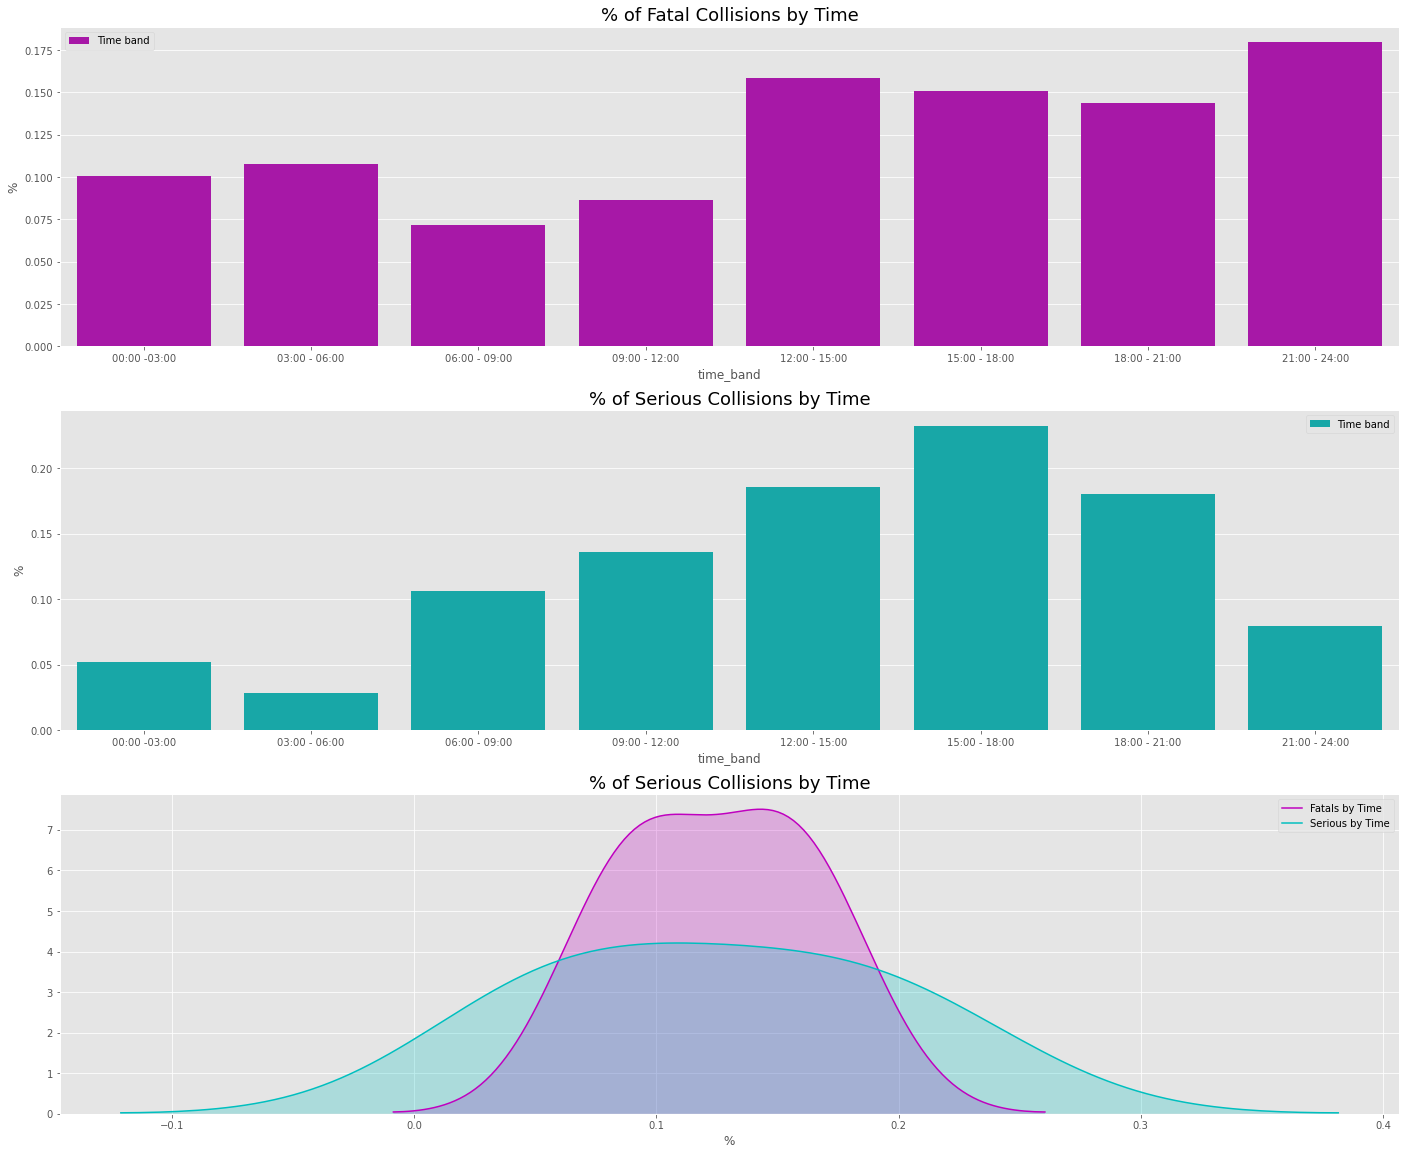

In [63]:
plt.subplot(3,1,1)
plt.title('% of Fatal Collisions by Time',fontsize=18)
sns.barplot(x='time_band',y='%',data=fatals_by_time,label="Time band",color='m')
plt.legend()

plt.subplot(3,1,2)
plt.title('% of Serious Collisions by Time',fontsize=18)
sns.barplot(x='time_band',y='%',data=serious_by_time,label="Time band",color='c')
plt.legend()

plt.subplot(3,1,3)
plt.title('% of Serious Collisions by Time',fontsize=18)
sns.distplot(fatals_by_time['%'],hist=False,kde_kws={"shade": True},color='m',label = 'Fatals by Time')
sns.distplot(serious_by_time['%'],hist=False,kde_kws={"shade": True},color='c',label = 'Serious by Time')
plt.legend();

#### We will use some conditions to distribute time bands accroding to fatal and serious as their distribution and % breakdown differ

In [64]:
#fatals by time p values
fatals_time_p = np.array(fatals_by_time['%'])
fatals_time_bands = np.array(fatals_by_time['time_band'])

#serious by time p values
serious_time_p = np.array(serious_by_time['%'])
serious_time_bands = np.array(serious_by_time['time_band'])


#### Adding new column to our dataset based on the *p* values for fatals by time and serious by time

In [65]:
df['Time_Band'] = np.where(df['Collision Type']== 'Fatal', rng.choice(fatals_time_bands, dataset_size, p=fatals_time_p)
                        ,rng.choice(serious_time_bands, dataset_size, p=serious_time_p))

#### A look at our new column broken down by collision type to compare distribution with actual data

In [66]:
sim_fatals_by_time = df[df['Collision Type'] == 'Fatal'].groupby('Time_Band').agg({'Collision Type':'count'}).reset_index()
sim_serious_by_time = df[df['Collision Type'] == 'Serious'].groupby('Time_Band').agg({'Collision Type':'count'}).reset_index()

sim_fatals_by_time['%']=sim_fatals_by_time['Collision Type']/sum(sim_fatals_by_time['Collision Type'])
sim_serious_by_time['%']=sim_serious_by_time['Collision Type']/sum(sim_serious_by_time['Collision Type'])

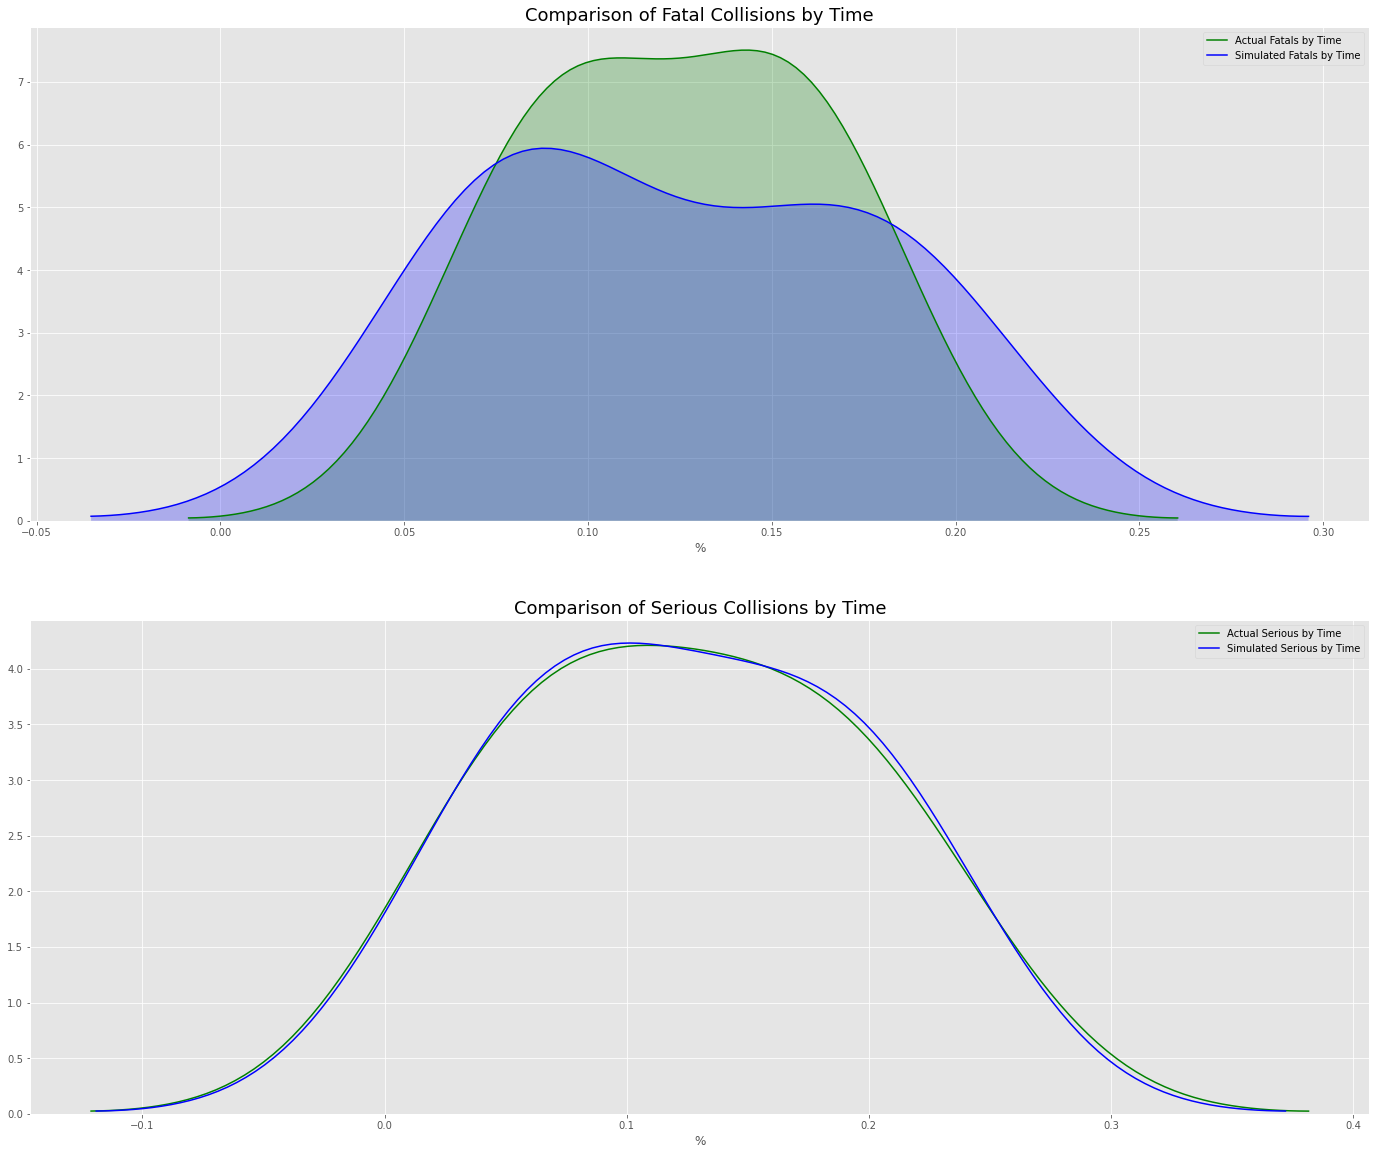

In [67]:
plt.subplot(2,1,1)
plt.title('Comparison of Fatal Collisions by Time',fontsize=18)
sns.distplot(fatals_by_time['%'],hist=False,kde_kws={"shade": True},color='Green',label = 'Actual Fatals by Time')
sns.distplot(sim_fatals_by_time['%'],hist=False,kde_kws={"shade": True},color='Blue',label = 'Simulated Fatals by Time')
plt.legend()

plt.subplot(2,1,2)
plt.title('Comparison of Serious Collisions by Time',fontsize=18)
sns.distplot(serious_by_time['%'],hist=False,kde_kws={"shade": False},color='Green',label = 'Actual Serious by Time')
sns.distplot(sim_serious_by_time['%'],hist=False,kde_kws={"shade": False},color='Blue',label = 'Simulated Serious by Time')
plt.legend();

### Road User Types

In [68]:
by_road_user = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Roaduser.csv')

In [69]:
by_road_user

,User,Type,2014,2015,2016,2017,2018
0,Pedestrians,Serious,1065,1043,1042,1136,1105
1,Pedal cyclists,Serious,864,933,971,1061,1074
2,Motor cyclists,Serious,291,338,383,355,470
3,All Car users,Serious,5237,4910,4754,4683,4686
4,Other road users,Serious,622,616,623,547,676
5,Pedestrians,Fatalities,41,31,35,31,42
6,Pedal cyclists,Fatalities,13,10,10,14,9
7,Motor cyclists,Fatalities,24,22,22,19,15
8,All Car users,Fatalities,103,89,106,78,62
9,Other road users,Fatalities,11,10,9,13,11


In [70]:
fatals_by_user = by_road_user[by_road_user['Type'] == 'Fatalities'].groupby('User').agg({'2018':sum}).reset_index()
serious_by_user = by_road_user[by_road_user['Type'] == 'Serious'].groupby('User').agg({'2018':sum}).reset_index()

fatals_by_user['%'] = fatals_by_user['2018']/sum(fatals_by_user['2018'])
serious_by_user['%'] = serious_by_user['2018']/sum(serious_by_user['2018'])

In [71]:
fatals_by_user

,User,2018,%
0,All Car users,62,0.446043
1,Motor cyclists,15,0.107914
2,Other road users,11,0.079137
3,Pedal cyclists,9,0.064748
4,Pedestrians,42,0.302158


In [72]:
serious_by_user

,User,2018,%
0,All Car users,4686,0.584946
1,Motor cyclists,470,0.058669
2,Other road users,676,0.084384
3,Pedal cyclists,1074,0.134066
4,Pedestrians,1105,0.137935


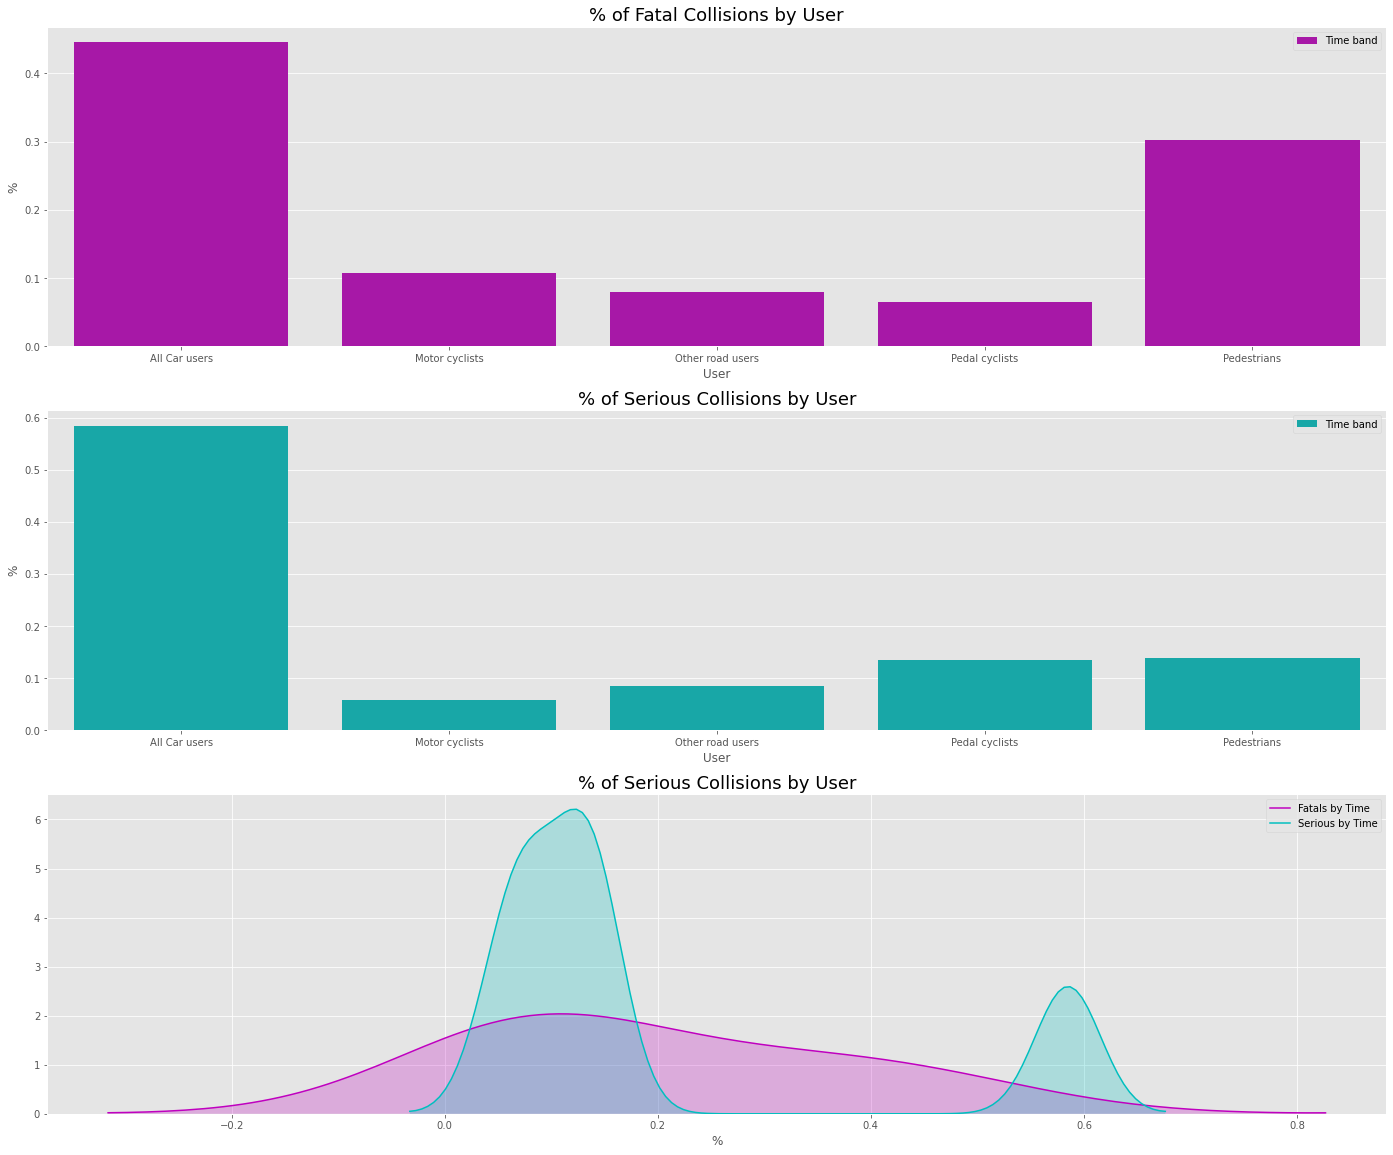

In [73]:
plt.subplot(3,1,1)
plt.title('% of Fatal Collisions by User',fontsize=18)
sns.barplot(x='User',y='%',data=fatals_by_user,label="Time band",color='m')
plt.legend()

plt.subplot(3,1,2)
plt.title('% of Serious Collisions by User',fontsize=18)
sns.barplot(x='User',y='%',data=serious_by_user,label="Time band",color='c')
plt.legend()

plt.subplot(3,1,3)
plt.title('% of Serious Collisions by User',fontsize=18)
sns.distplot(fatals_by_user['%'],hist=False,kde_kws={"shade": True},color='m',label = 'Fatals by Time')
sns.distplot(serious_by_user['%'],hist=False,kde_kws={"shade": True},color='c',label = 'Serious by Time')
plt.legend();

#### Again, we will use some conditions to distribute time bands accroding to fatal and serious as their distribution and % breakdown differ

In [74]:
#fatals by time p values
fatals_user_p = np.array(fatals_by_user['%'])
fatals_user_group = np.array(fatals_by_user['User'])

#serious by time p values
serious_user_p = np.array(serious_by_user['%'])
serious_user_group = np.array(serious_by_user['User'])


In [75]:
df['Road User'] = np.where(df['Collision Type']== 'Fatal', rng.choice(fatals_user_group, dataset_size, p=fatals_user_p)
                        ,rng.choice(serious_user_group, dataset_size, p=serious_user_p))

#### #### A look at our new column broken down by collision type to compare distribution with actual data

In [76]:
sim_fatals_by_user = df[df['Collision Type'] == 'Fatal'].groupby('Road User').agg({'Collision Type':'count'}).reset_index()
sim_serious_by_user = df[df['Collision Type'] == 'Serious'].groupby('Road User').agg({'Collision Type':'count'}).reset_index()

sim_fatals_by_user['%']=sim_fatals_by_user['Collision Type']/sum(sim_fatals_by_user['Collision Type'])
sim_serious_by_user['%']=sim_serious_by_user['Collision Type']/sum(sim_serious_by_user['Collision Type'])

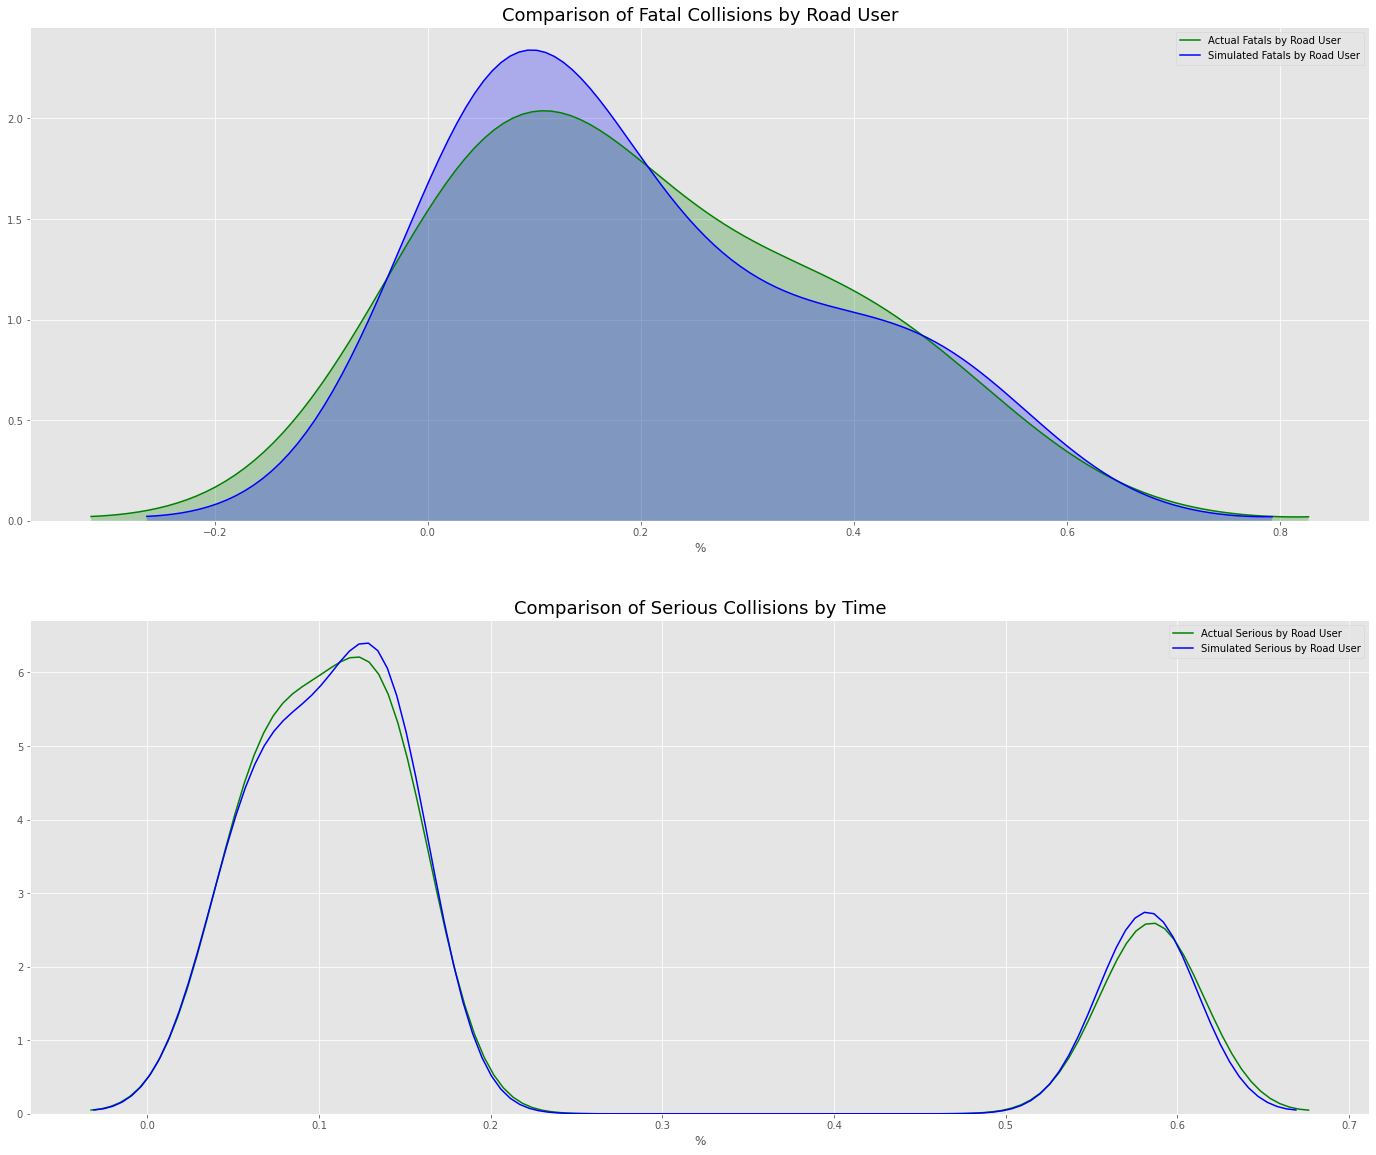

In [77]:
plt.subplot(2,1,1)
plt.title('Comparison of Fatal Collisions by Road User',fontsize=18)
sns.distplot(fatals_by_user['%'],hist=False,kde_kws={"shade": True},color='Green',label = 'Actual Fatals by Road User')
sns.distplot(sim_fatals_by_user['%'],hist=False,kde_kws={"shade": True},color='Blue',label = 'Simulated Fatals by Road User')
plt.legend()

plt.subplot(2,1,2)
plt.title('Comparison of Serious Collisions by Time',fontsize=18)
sns.distplot(serious_by_user['%'],hist=False,kde_kws={"shade": False},color='Green',label = 'Actual Serious by Road User')
sns.distplot(sim_serious_by_user['%'],hist=False,kde_kws={"shade": False},color='Blue',label = 'Simulated Serious by Road User')
plt.legend();

In [78]:
df.head()

,Date,Day,Month,Collision Type,Gender,Age Band,Time_Band,Road User
0,2018-01-27,Saturday,January,Serious,Male,55 - 64 years,18:00 - 21:00,All Car users
1,2018-01-21,Sunday,January,Serious,Female,6 - 9 years,18:00 - 21:00,All Car users
2,2018-01-18,Thursday,January,Serious,Female,35 - 44 years,06:00 - 09:00,All Car users
3,2018-01-29,Monday,January,Serious,Male,35 - 44 years,12:00 - 15:00,All Car users
4,2018-01-01,Monday,January,Serious,Female,55 - 64 years,12:00 - 15:00,Pedal cyclists


In [79]:
df.tail()

,Date,Day,Month,Collision Type,Gender,Age Band,Time_Band,Road User
8145,2018-12-28,Friday,December,Serious,Male,21 - 24 years,06:00 - 09:00,Pedestrians
8146,2018-12-21,Friday,December,Serious,Male,25 - 34 years,12:00 - 15:00,All Car users
8147,2018-12-16,Sunday,December,Serious,Male,18 - 20 years,15:00 - 18:00,All Car users
8148,2018-12-11,Tuesday,December,Serious,Female,25 - 34 years,15:00 - 18:00,All Car users
8149,2018-12-29,Saturday,December,Serious,Male,35 - 44 years,00:00 -03:00,Other road users


### Aggregations by Date